<a href="https://colab.research.google.com/github/antonellagambarte/proyecto-final-CEIA/blob/main/Modelo_final_busqueda_de_diferencia_PRUEBAS_NUEVAS_NHANES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE

In [131]:
ruta_archivo_train = '/content/drive/My Drive/NHANES/dataset_train_imputado.csv'
ruta_archivo_test = '/content/drive/My Drive/NHANES/dataset_test_imputado.csv'


df_train = pd.read_csv(ruta_archivo_train)
df_test = pd.read_csv(ruta_archivo_test)

In [132]:
df_train.head()

,edad,genero,colesterol_total,hdl,ldl,trigliceridos,proteina_c,bmi,fumo_100_cigarrillos,fumador_actual,...,consumo_excesivo_alcohol_ultimo_año_8.0,consumo_excesivo_alcohol_ultimo_año_9.0,consumo_excesivo_alcohol_ultimo_año_10.0,consumo_excesivo_alcohol_ultimo_año_22.0,consumo_excesivo_alcohol_ultimo_año_23.0,consumo_excesivo_alcohol_ultimo_año_99.0,anhedonia_1.0,anhedonia_2.0,anhedonia_3.0,anhedonia_9.0
0,0.027815,1,0.635525,-0.409169,110.804858,1.430187,-0.633385,-0.926269,1,-0.450093,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.598832,1,-0.236009,0.044620,100.609504,-0.035063,-0.681892,-1.527568,0,-0.450093,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.869431,1,-0.154793,-0.056492,105.080360,-0.040414,-0.646549,-0.547527,1,2.387436,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.084401,1,0.421306,0.838667,118.001130,-0.366252,-0.041933,-0.024172,0,-0.450093,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.589371,0,0.226934,-0.409169,112.161330,0.702848,0.117120,0.260671,0,-0.450093,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [133]:
df_train['bmi']

,bmi
0,-0.926269
1,-1.527568
2,-0.547527
3,-0.024172
4,0.260671
...,...
4449,1.355906
4450,1.412917
4451,-0.133701
4452,0.690750


In [134]:
df_test.head()

,edad,genero,colesterol_total,hdl,ldl,trigliceridos,proteina_c,bmi,fumo_100_cigarrillos,fumador_actual,...,consumo_excesivo_alcohol_ultimo_año_8.0,consumo_excesivo_alcohol_ultimo_año_9.0,consumo_excesivo_alcohol_ultimo_año_10.0,consumo_excesivo_alcohol_ultimo_año_22.0,consumo_excesivo_alcohol_ultimo_año_23.0,consumo_excesivo_alcohol_ultimo_año_99.0,anhedonia_1.0,anhedonia_2.0,anhedonia_3.0,anhedonia_9.0
0,0.196138,0,0.770258,-0.658294,150.000000,-0.004461,-0.450077,0.112943,1,-0.450093,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.598832,0,-0.431028,-0.251770,68.593972,1.372133,-1.033075,-1.237209,1,2.387436,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.869431,0,0.658245,-0.251770,135.000000,0.354777,-1.308794,-0.796544,1,-0.450093,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.308353,0,-0.724117,-1.744878,78.000000,1.241630,0.377605,-0.945102,0,-0.450093,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.084401,1,0.354166,-0.251770,112.198324,0.850878,-0.663495,-0.360865,0,-0.450093,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [135]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 83 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   edad                                      4454 non-null   float64
 1   genero                                    4454 non-null   int64  
 2   colesterol_total                          4454 non-null   float64
 3   hdl                                       4454 non-null   float64
 4   ldl                                       4454 non-null   float64
 5   trigliceridos                             4454 non-null   float64
 6   proteina_c                                4454 non-null   float64
 7   bmi                                       4454 non-null   float64
 8   fumo_100_cigarrillos                      4454 non-null   int64  
 9   fumador_actual                            4454 non-null   float64
 10  act_vigorosa                        

In [136]:
df_train_temp = df_train.copy()
df_test_temp = df_test.copy()

# columnas_eliminadas = ['raza_origen_7','act_caminar_bici_2.0','act_caminar_bici_9.0','act_moderada_2.0','act_moderada_9.0',
#                        'raza_origen_1','raza_origen_2', 'raza_origen_3','raza_origen_4', 'raza_origen_6','colesterol_alto_2.0',
#                        'colesterol_alto_9.0','fumador_actual', 'ancho_distribucion_globulos','fam_asma_2.0', 'fam_asma_9.0',
#                        'glicohemoglobina','realiza_actividad_intensidad_moderada',
#                        'consumo_excesivo_alcohol_ultimo_año','act_vigorosa']

# columnas_eliminadas = ['raza_origen_7','act_caminar_bici_2.0','act_caminar_bici_9.0','act_moderada_2.0','act_moderada_9.0',
#                        'raza_origen_1','raza_origen_2', 'raza_origen_3','raza_origen_4', 'raza_origen_6','colesterol_alto_2.0',
#                        'colesterol_alto_9.0','fumador_actual' ,'realiza_actividad_intensidad_moderada',
#                        'consumo_excesivo_alcohol_ultimo_año','act_vigorosa']

columnas_eliminadas = []

df_train_temp.drop(columns=columnas_eliminadas, inplace=True)
df_test_temp.drop(columns=columnas_eliminadas, inplace=True)

df_train_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 83 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   edad                                      4454 non-null   float64
 1   genero                                    4454 non-null   int64  
 2   colesterol_total                          4454 non-null   float64
 3   hdl                                       4454 non-null   float64
 4   ldl                                       4454 non-null   float64
 5   trigliceridos                             4454 non-null   float64
 6   proteina_c                                4454 non-null   float64
 7   bmi                                       4454 non-null   float64
 8   fumo_100_cigarrillos                      4454 non-null   int64  
 9   fumador_actual                            4454 non-null   float64
 10  act_vigorosa                        

In [137]:
TARGET = "alto_riesgo"

X_train = df_train_temp.drop(columns=[TARGET])
y_train = df_train_temp[TARGET]

X_test = df_test_temp.drop(columns=[TARGET])
y_test = df_test_temp[TARGET]

## **COLUMNAS USADAS EN EL ENTRENAMIENTO**

ETAPA 1: contiene las de nivel 1 y 2

ETAPA 2: contine las de etapa 1 y suma laboratorio

In [138]:
nivel_1_basico = [
    'edad', 'genero', 'fumo_100_cigarrillos',
    'consumo_alcohol_ultimo_año_1.0', 'actividad_deportiva_moderada_x_semana', 'anhedonia_1.0', 'anhedonia_2.0', 'anhedonia_9.0', 'anhedonia_3.0',
    'consumo_alcohol_ultimo_año_2.0', 'consumo_alcohol_ultimo_año_3.0', 'consumo_alcohol_ultimo_año_4.0', 'consumo_alcohol_ultimo_año_5.0',
    'consumo_alcohol_ultimo_año_6.0', 'consumo_alcohol_ultimo_año_7.0', 'consumo_alcohol_ultimo_año_8.0', 'consumo_alcohol_ultimo_año_9.0',
    'consumo_alcohol_ultimo_año_10.0', 'consumo_alcohol_ultimo_año_20.0', 'consumo_alcohol_ultimo_año_99.0',
]

# ETAPA 2
nivel_2_antecedentes = [
     'bmi', 'presion_sistolica_final', 'presion_diastolica_final', 'fam_cardio_2.0', 'fam_diabetes_2.0', 'fam_asma_9.0', 'riñones_debiles_fallando_2.0',
     'hipertension_2', 'diabetes_2.0'
]



# ETAPA 3: Análisis de Laboratorio
nivel_3_laboratorio = [
   'colesterol_total', 'hdl', 'trigliceridos', 'proteina_c', 'hemoglobina', 'creatinina', 'acido_urico', 'potasio'
]




In [139]:
from sklearn.metrics import (
    roc_auc_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluar_overfitting(
    modelo,
    X_train, y_train,
    X_test, y_test,
    threshold=0.25,
    nombre="Modelo"
):

    # Probabilidades
    prob_train = modelo.predict_proba(X_train)[:, 1]
    prob_test = modelo.predict_proba(X_test)[:, 1]

    # Predicciones binarias
    pred_train = (prob_train >= threshold).astype(int)
    pred_test = (prob_test >= threshold).astype(int)

    # Métricas train
    auc_train = roc_auc_score(y_train, prob_train)
    recall_train = recall_score(y_train, pred_train)
    precision_train = precision_score(y_train, pred_train)
    f1_train = f1_score(y_train, pred_train)

    # Métricas test
    auc_test = roc_auc_score(y_test, prob_test)
    recall_test = recall_score(y_test, pred_test)
    precision_test = precision_score(y_test, pred_test)
    f1_test = f1_score(y_test, pred_test)

    print(f"\n===== {nombre} ====")
    print("---- TRAIN ----")
    print(f"AUC: {auc_train:.4f}")
    print(f"Recall: {recall_train:.4f}")
    print(f"Precision: {precision_train:.4f}")
    print(f"F1: {f1_train:.4f}")

    print("\n---- TEST ----")
    print(f"AUC: {auc_test:.4f}")
    print(f"Recall: {recall_test:.4f}")
    print(f"Precision: {precision_test:.4f}")
    print(f"F1: {f1_test:.4f}")

    auc_gap = auc_train - auc_test
    recall_gap = recall_train - recall_test
    print(f"\n---- GAP (Train-Test) ----")
    print(f"AUC gap: {auc_gap:.4f}")
    print(f"Recall gap: {recall_gap:.4f}")

    # Matriz de confusión para el conjunto de prueba
    cm = confusion_matrix(y_test, pred_test)
    labels = ["Bajo riesgo", "Alto riesgo"]

    # Normalizar la matriz de confusión para mostrar porcentajes
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6,5))
    sns.heatmap(
        cm_normalized,
        annot=True,
        fmt=".2%", # Formato de porcentaje con 2 decimales
        cmap="Blues",
        xticklabels=labels,
        yticklabels=labels
    )
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusión Normalizada - {nombre} (TEST)")
    plt.show()

    return {
        "auc_train": auc_train,
        "recall_train": recall_train,
        "precision_train": precision_train,
        "f1_train": f1_train,
        "auc_test": auc_test,
        "recall_test": recall_test,
        "precision_test": precision_test,
        "f1_test": f1_test,
        "auc_gap": auc_gap,
        "recall_gap": recall_gap
    }

In [141]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

# Número de features a seleccionar
k = 20

# ANOVA
selector_anova = SelectKBest(score_func=f_classif, k=k)
selector_anova.fit(X_train, y_train)
X_train_anova = selector_anova.transform(X_train)
X_test_anova = selector_anova.transform(X_test)

selector_mi = SelectKBest(score_func=mutual_info_classif, k=k)
selector_mi.fit(X_train, y_train)
X_train_mi = selector_mi.transform(X_train)
X_test_mi = selector_mi.transform(X_test)

In [142]:
import pandas as pd

# Para ANOVA
X_train_anova_df = pd.DataFrame(
    X_train_anova,
    columns=X_train.columns[selector_anova.get_support()]
)
X_test_anova_df = pd.DataFrame(
    X_test_anova,
    columns=X_train.columns[selector_anova.get_support()]
)

print(X_train_anova_df.info())
print(X_train_anova_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   4454 non-null   float64
 1   genero                                 4454 non-null   float64
 2   colesterol_total                       4454 non-null   float64
 3   ldl                                    4454 non-null   float64
 4   fumo_100_cigarrillos                   4454 non-null   float64
 5   realiza_actividad_intensidad_moderada  4454 non-null   float64
 6   glicohemoglobina                       4454 non-null   float64
 7   ancho_distribucion_globulos            4454 non-null   float64
 8   creatinina                             4454 non-null   float64
 9   acido_urico                            4454 non-null   float64
 10  potasio                                4454 non-null   float64
 11  pres

In [143]:
# Inicializamos la lista para almacenar los resultados de los modelos
results = []

In [144]:
df_results = pd.DataFrame(results)

df_results

""


In [145]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114 entries, 0 to 1113
Data columns (total 82 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   edad                                      1114 non-null   float64
 1   genero                                    1114 non-null   int64  
 2   colesterol_total                          1114 non-null   float64
 3   hdl                                       1114 non-null   float64
 4   ldl                                       1114 non-null   float64
 5   trigliceridos                             1114 non-null   float64
 6   proteina_c                                1114 non-null   float64
 7   bmi                                       1114 non-null   float64
 8   fumo_100_cigarrillos                      1114 non-null   int64  
 9   fumador_actual                            1114 non-null   float64
 10  act_vigorosa                        

In [146]:
nivel_1_cols = [c for c in nivel_1_basico if c in X_train.columns]
nivel_2_cols = nivel_1_cols + [c for c in nivel_2_antecedentes if c in X_train.columns]
nivel_3_cols = nivel_2_cols + [c for c in nivel_3_laboratorio if c in X_train.columns]

# Definición de las etapas
etapas = [nivel_2_cols, nivel_3_cols]
nombres_etapas = ["Etapa 1: Básica + Antecedentes", "Etapa 2: + Laboratorio"]

AUC (Cross-Validation) - Mean: 0.8547, Std: 0.0082
Recall (Cross-Validation) - Mean: 0.7993, Std: 0.0256

 EVALUANDO CON REGRESIÓN LOGÍSTICA: Etapa 1: Básico + Antecedentes

===== LR - Etapa 1: Básico + Antecedentes ====
---- TRAIN ----
AUC: 0.8634
Recall: 0.8734
Precision: 0.2803
F1: 0.4244

---- TEST ----
AUC: 0.8448
Recall: 0.8551
Precision: 0.2830
F1: 0.4252

---- GAP (Train-Test) ----
AUC gap: 0.0186
Recall gap: 0.0183


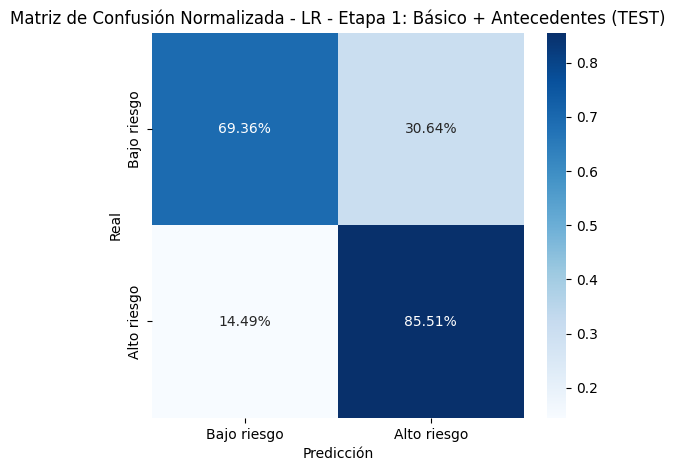

AUC (Cross-Validation) - Mean: 0.8585, Std: 0.0073
Recall (Cross-Validation) - Mean: 0.7903, Std: 0.0274

 EVALUANDO CON REGRESIÓN LOGÍSTICA: Etapa 2: + Laboratorio + Features

===== LR - Etapa 2: + Laboratorio + Features ====
---- TRAIN ----
AUC: 0.8692
Recall: 0.8770
Precision: 0.2920
F1: 0.4381

---- TEST ----
AUC: 0.8545
Recall: 0.8188
Precision: 0.2846
F1: 0.4224

---- GAP (Train-Test) ----
AUC gap: 0.0148
Recall gap: 0.0582


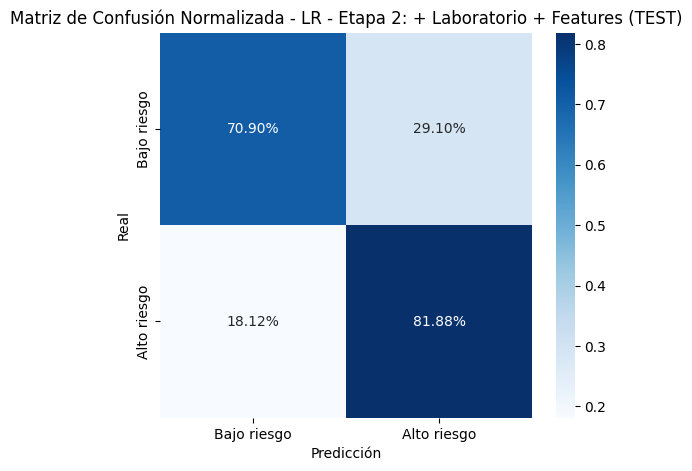


 RESUMEN FINAL POR ETAPAS (LOGISTIC REGRESSION):
                               Etapa  auc_test  recall_test  precision_test  \
0     Etapa 1: Básico + Antecedentes  0.844834     0.855072        0.282974   
1  Etapa 2: + Laboratorio + Features  0.854493     0.818841        0.284635   

   auc_cv_mean  recall_cv_mean  
0     0.854689        0.799296  
1     0.858514        0.790254  


,Etapa,auc_train,recall_train,precision_train,f1_train,auc_test,recall_test,precision_test,f1_test,auc_gap,recall_gap,auc_cv_mean,auc_cv_std,recall_cv_mean,recall_cv_std
0,Etapa 1: Básico + Antecedentes,0.863423,0.873418,0.280325,0.424429,0.844834,0.855072,0.282974,0.425225,0.018589,0.018345,0.854689,0.008218,0.799296,0.025602
1,Etapa 2: + Laboratorio + Features,0.869244,0.877034,0.291993,0.438121,0.854493,0.818841,0.284635,0.422430,0.014751,0.058194,0.858514,0.007254,0.790254,0.027432


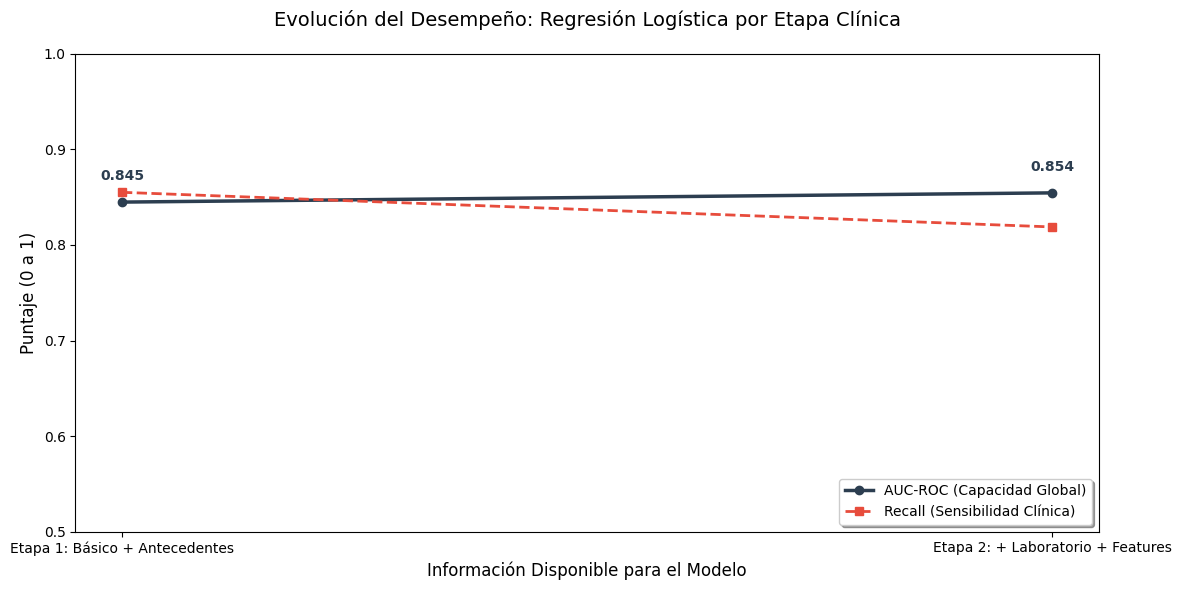

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

resultados_etapas_lr = []
modelos_lr = []

for i in range(len(etapas)):
# Bucle de entrenamiento por etapas usando Regresión Logística
    # Se selecciona las columnas de la etapa actual
    X_train_etapa = X_train[etapas[i]]
    X_test_etapa = X_test[etapas[i]]

    # Configuración la Regresión Logística
    modelo_etapa_lr = LogisticRegression(
         class_weight='balanced',
         max_iter=5000,
         penalty='l2',
         solver='lbfgs',
         C=1.0,
         random_state=42
    )

    # Inicializar StratifiedKFold para cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Realizar cross-validation y obtener scores
    cv_auc_scores = cross_val_score(modelo_etapa_lr, X_train_etapa, y_train, cv=skf, scoring='roc_auc', error_score='raise')
    cv_recall_scores = cross_val_score(modelo_etapa_lr, X_train_etapa, y_train, cv=skf, scoring='recall', error_score='raise')

    auc_cv_mean = cv_auc_scores.mean()
    auc_cv_std = cv_auc_scores.std()
    recall_cv_mean = cv_recall_scores.mean()
    recall_cv_std = cv_recall_scores.std()

    print(f"AUC (Cross-Validation) - Mean: {auc_cv_mean:.4f}, Std: {auc_cv_std:.4f}")
    print(f"Recall (Cross-Validation) - Mean: {recall_cv_mean:.4f}, Std: {recall_cv_std:.4f}")

    modelo_etapa_lr.fit(X_train_etapa, y_train)

    modelos_lr.append(modelo_etapa_lr)

    print(f"\n EVALUANDO CON REGRESIÓN LOGÍSTICA: {nombres_etapas[i]}")
    metricas = evaluar_overfitting(
        modelo_etapa_lr,
        X_train_etapa, y_train,
        X_test_etapa, y_test,
        threshold=0.4,
        nombre=f"LR - {nombres_etapas[i]}"
    )

    resultados_etapas_lr.append({"Etapa": nombres_etapas[i], **metricas, "auc_cv_mean": auc_cv_mean, "auc_cv_std": auc_cv_std, "recall_cv_mean": recall_cv_mean, "recall_cv_std": recall_cv_std})

df_etapas_lr = pd.DataFrame(resultados_etapas_lr)

# Resumen final de precisión
print("\n RESUMEN FINAL POR ETAPAS (LOGISTIC REGRESSION):")
print(df_etapas_lr[['Etapa', 'auc_test', 'recall_test', 'precision_test', 'auc_cv_mean', 'recall_cv_mean']])
display(df_etapas_lr)

plt.figure(figsize=(12, 6))

plt.plot(df_etapas_lr['Etapa'], df_etapas_lr['auc_test'],
         marker='o', linestyle='-', color='#2c3e50', linewidth=2.5, label='AUC-ROC (Capacidad Global)')

plt.plot(df_etapas_lr['Etapa'], df_etapas_lr['recall_test'],
         marker='s', linestyle='--', color='#e74c3c', linewidth=2, label='Recall (Sensibilidad Clínica)')

plt.title('Evolución del Desempeño: Regresión Logística por Etapa Clínica', fontsize=14, pad=20)
plt.ylabel('Puntaje (0 a 1)', fontsize=12)
plt.xlabel('Información Disponible para el Modelo', fontsize=12)
plt.ylim(0.5, 1.0)
plt.legend(loc='lower right', frameon=True, shadow=True)

for x, y in zip(df_etapas_lr['Etapa'], df_etapas_lr['auc_test']):
    plt.text(x, y + 0.02, f'{y:.3f}', ha='center', va='bottom', fontweight='bold', color='#2c3e50')

plt.tight_layout()
plt.show()

# **RAMDOM**

AUC (Cross-Validation) - Mean: 0.8463, Std: 0.0098
Recall (Cross-Validation) - Mean: 0.7812, Std: 0.0249

 EVALUANDO CON RANDOM FOREST: Etapa 1: Básico + Antecedentes

===== RF - Etapa 1: Básico + Antecedentes ====
---- TRAIN ----
AUC: 0.8774
Recall: 0.9439
Precision: 0.2513
F1: 0.3970

---- TEST ----
AUC: 0.8456
Recall: 0.9130
Precision: 0.2480
F1: 0.3901

---- GAP (Train-Test) ----
AUC gap: 0.0317
Recall gap: 0.0309


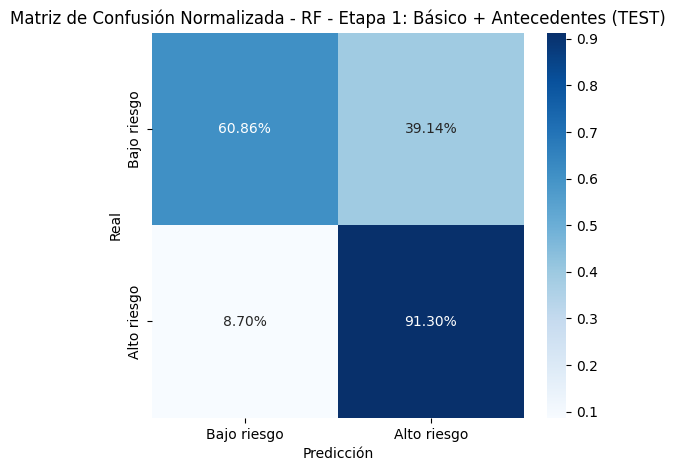

AUC (Cross-Validation) - Mean: 0.8480, Std: 0.0106
Recall (Cross-Validation) - Mean: 0.7487, Std: 0.0332

 EVALUANDO CON RANDOM FOREST: Etapa 2: + Laboratorio + Features

===== RF - Etapa 2: + Laboratorio + Features ====
---- TRAIN ----
AUC: 0.8925
Recall: 0.9458
Precision: 0.2666
F1: 0.4159

---- TEST ----
AUC: 0.8488
Recall: 0.9058
Precision: 0.2604
F1: 0.4045

---- GAP (Train-Test) ----
AUC gap: 0.0437
Recall gap: 0.0400


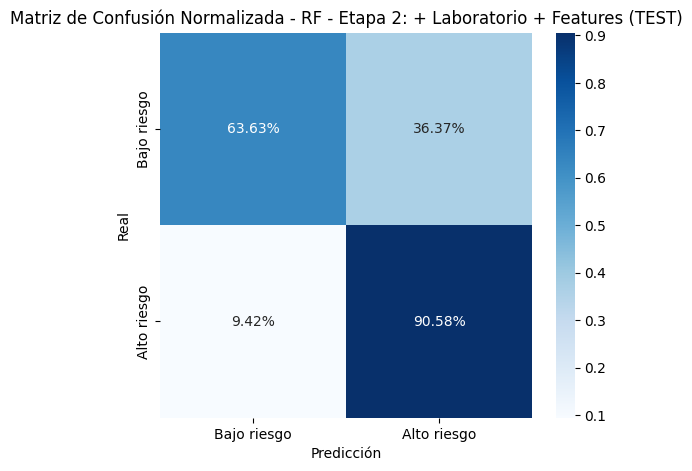


 RESUMEN FINAL POR ETAPAS (RANDOM FOREST):
                               Etapa  auc_test  recall_test  precision_test  \
0     Etapa 1: Básico + Antecedentes  0.845636     0.913043        0.248031   
1  Etapa 2: + Laboratorio + Features  0.848821     0.905797        0.260417   

   auc_cv_mean  recall_cv_mean  
0     0.846311        0.781212  
1     0.848046        0.748681  


,Etapa,auc_train,recall_train,precision_train,f1_train,auc_test,recall_test,precision_test,f1_test,auc_gap,recall_gap,auc_cv_mean,auc_cv_std,recall_cv_mean,recall_cv_std
0,Etapa 1: Básico + Antecedentes,0.877358,0.943942,0.251324,0.396958,0.845636,0.913043,0.248031,0.390093,0.031722,0.030899,0.846311,0.009838,0.781212,0.024947
1,Etapa 2: + Laboratorio + Features,0.892514,0.945750,0.266565,0.415905,0.848821,0.905797,0.260417,0.404531,0.043693,0.039953,0.848046,0.010626,0.748681,0.033186


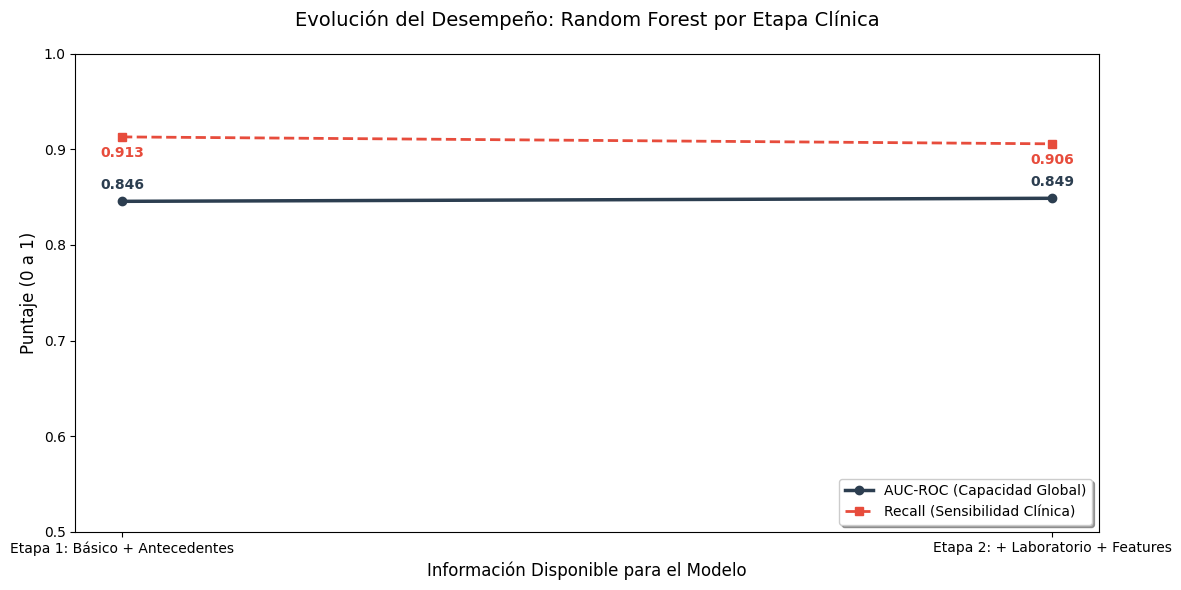

In [189]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

resultados_etapas_rf = []
modelos_rf_staged = []

for i in range(len(etapas)):

    X_train_etapa_rf = X_train[etapas[i]]
    X_test_etapa_rf = X_test[etapas[i]]

    modelo_etapa_rf = RandomForestClassifier(
        n_estimators=500,
        max_depth=5,
        min_samples_leaf=10,
        max_features='sqrt',
        class_weight='balanced',
        random_state=42,
    )

    # Inicializar StratifiedKFold para cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Realizar cross-validation y obtener scores
    cv_auc_scores = cross_val_score(modelo_etapa_rf, X_train_etapa_rf, y_train, cv=skf, scoring='roc_auc', error_score='raise')
    cv_recall_scores = cross_val_score(modelo_etapa_rf, X_train_etapa_rf, y_train, cv=skf, scoring='recall', error_score='raise')

    auc_cv_mean = cv_auc_scores.mean()
    auc_cv_std = cv_auc_scores.std()
    recall_cv_mean = cv_recall_scores.mean()
    recall_cv_std = cv_recall_scores.std()

    print(f"AUC (Cross-Validation) - Mean: {auc_cv_mean:.4f}, Std: {auc_cv_std:.4f}")
    print(f"Recall (Cross-Validation) - Mean: {recall_cv_mean:.4f}, Std: {recall_cv_std:.4f}")

    modelo_etapa_rf.fit(X_train_etapa_rf, y_train)


    modelos_rf_staged.append(modelo_etapa_rf)


    print(f"\n EVALUANDO CON RANDOM FOREST: {nombres_etapas[i]}")
    metricas_rf_etapa = evaluar_overfitting(
        modelo_etapa_rf,
        X_train_etapa_rf, y_train,
        X_test_etapa_rf, y_test,
        threshold=0.4,
        nombre=f"RF - {nombres_etapas[i]}"
    )
    # Store the metrics
    resultados_etapas_rf.append({"Etapa": nombres_etapas[i], **metricas_rf_etapa, "auc_cv_mean": auc_cv_mean, "auc_cv_std": auc_cv_std, "recall_cv_mean": recall_cv_mean, "recall_cv_std": recall_cv_std})


df_etapas_rf = pd.DataFrame(resultados_etapas_rf)


for rf_metrics_dict in resultados_etapas_rf:

    rf_metrics_for_global_results = rf_metrics_dict.copy()

    rf_metrics_for_global_results['Modelo'] = f"Random Forest - {rf_metrics_for_global_results['Etapa']}"

    del rf_metrics_for_global_results['Etapa']
    results.append(rf_metrics_for_global_results)

print("\n RESUMEN FINAL POR ETAPAS (RANDOM FOREST):")
print(df_etapas_rf[['Etapa', 'auc_test', 'recall_test', 'precision_test', 'auc_cv_mean', 'recall_cv_mean']])
display(df_etapas_rf)


plt.figure(figsize=(12, 6))

plt.plot(df_etapas_rf['Etapa'], df_etapas_rf['auc_test'],
         marker='o', linestyle='-', color='#2c3e50', linewidth=2.5, label='AUC-ROC (Capacidad Global)')

plt.plot(df_etapas_rf['Etapa'], df_etapas_rf['recall_test'],
         marker='s', linestyle='--', color='#e74c3c', linewidth=2, label='Recall (Sensibilidad Clínica)')

plt.title('Evolución del Desempeño: Random Forest por Etapa Clínica', fontsize=14, pad=20)
plt.ylabel('Puntaje (0 a 1)', fontsize=12)
plt.xlabel('Información Disponible para el Modelo', fontsize=12)
plt.ylim(0.5, 1.0)
plt.legend(loc='lower right', frameon=True, shadow=True)

for x_val, auc_val, recall_val in zip(df_etapas_rf['Etapa'], df_etapas_rf['auc_test'], df_etapas_rf['recall_test']):
    plt.text(x_val, auc_val + 0.01, f'{auc_val:.3f}', ha='center', va='bottom', fontweight='bold', color='#2c3e50')
    plt.text(x_val, recall_val - 0.01, f'{recall_val:.3f}', ha='center', va='top', fontweight='bold', color='#e74c3c')

plt.tight_layout()
plt.show()

Se modifican hiperparámetros para etapa 1 y 2. No se si es válido modificar el threshold. Pero se obtuvieron

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   4454 non-null   float64
 1   genero                                 4454 non-null   int64  
 2   fumo_100_cigarrillos                   4454 non-null   int64  
 3   consumo_alcohol_ultimo_año_1.0         4454 non-null   float64
 4   actividad_deportiva_moderada_x_semana  4454 non-null   float64
 5   anhedonia_1.0                          4454 non-null   float64
 6   anhedonia_2.0                          4454 non-null   float64
 7   anhedonia_9.0                          4454 non-null   float64
 8   anhedonia_3.0                          4454 non-null   float64
 9   consumo_alcohol_ultimo_año_2.0         4454 non-null   float64
 10  consumo_alcohol_ultimo_año_3.0         4454 non-null   float64
 11  cons

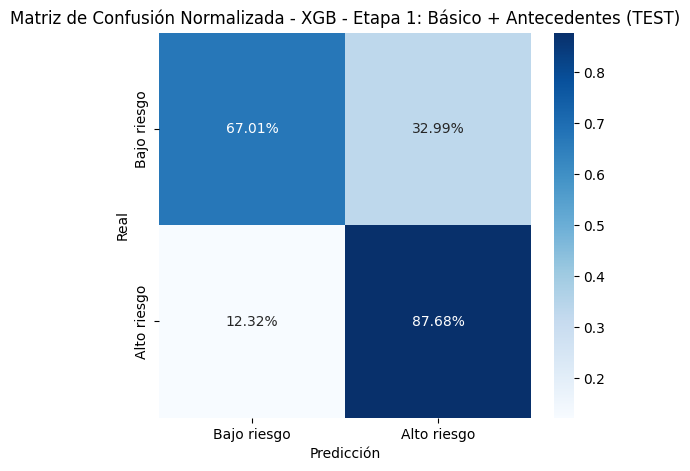

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   4454 non-null   float64
 1   genero                                 4454 non-null   int64  
 2   fumo_100_cigarrillos                   4454 non-null   int64  
 3   consumo_alcohol_ultimo_año_1.0         4454 non-null   float64
 4   actividad_deportiva_moderada_x_semana  4454 non-null   float64
 5   anhedonia_1.0                          4454 non-null   float64
 6   anhedonia_2.0                          4454 non-null   float64
 7   anhedonia_9.0                          4454 non-null   float64
 8   anhedonia_3.0                          4454 non-null   float64
 9   consumo_alcohol_ultimo_año_2.0         4454 non-null   float64
 10  consumo_alcohol_ultimo_año_3.0         4454 non-null   float64
 11  cons

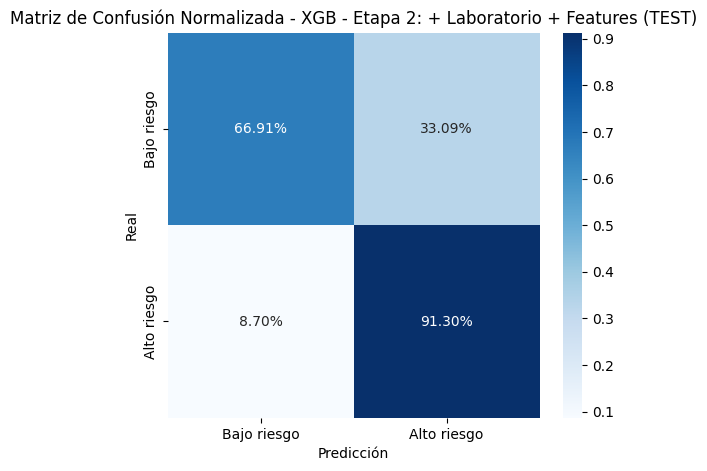


 RESUMEN FINAL POR ETAPAS (XGBOOST):
                               Etapa  auc_test  recall_test  precision_test
0     Etapa 1: Básico + Antecedentes  0.849088     0.876812        0.273138
1  Etapa 2: + Laboratorio + Features  0.856298     0.913043        0.280624


,Etapa,auc_train,recall_train,precision_train,f1_train,auc_test,recall_test,precision_test,f1_test,auc_gap,recall_gap,auc_cv_mean,auc_cv_std
0,Etapa 1: Básico + Antecedentes,0.878865,0.905967,0.277562,0.424936,0.849088,0.876812,0.273138,0.416523,0.029777,0.029156,0.851155,0.010291
1,Etapa 2: + Laboratorio + Features,0.904011,0.952984,0.287507,0.441744,0.856298,0.913043,0.280624,0.429302,0.047714,0.039940,0.852732,0.010900


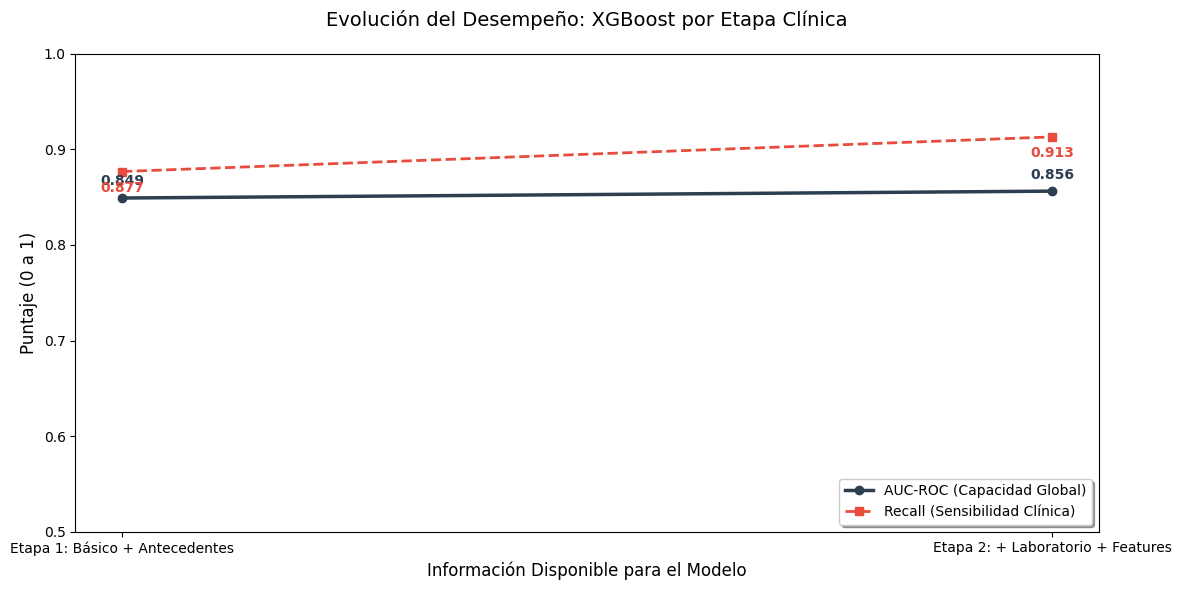

In [195]:
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# --- Inicializar listas para resultados y modelos ---
resultados_etapas_xgb = []
modelos_xgb_staged = []

# --- Loop por etapas para entrenar XGB ---
for i in range(len(etapas)):
    # Seleccionar features de la etapa actual
    X_train_etapa_xgb = X_train[etapas[i]].apply(pd.to_numeric, errors='coerce').fillna(0)
    X_test_etapa_xgb  = X_test[etapas[i]].apply(pd.to_numeric, errors='coerce').fillna(0)

    X_train_etapa_xgb.info()

    # Dentro del loop, ajustamos para que sea más robusto
    if i == 0:
      params = {
        'max_depth': 3,            # Bajamos a 3 para simplificar la base
        'learning_rate': 0.005,    # Más lento para que no se apure a memorizar
        'min_child_weight': 25,    # Más exigente
        'reg_lambda': 25,          # Más penalización L2
        'reg_alpha': 5,             # Agregamos penalización L1
        'scale_pos_weight': (sum(y_train==0)/sum(y_train==1)),
      }
    else:
    # Etapa 2: Un toque más de libertad, pero con mucha regularización
      params = {
        'max_depth': 4,
        'learning_rate': 0.005,
        'min_child_weight': 20,
        'reg_lambda': 30,          # Subimos L2 para controlar el gap
        'reg_alpha': 10,           # Subimos L1 para filtrar ruido de laboratorio
        'gamma': 1.5,               # Aumentamos el costo por cada división nueva
        'scale_pos_weight': (sum(y_train==0)/sum(y_train==1)) * 1.3,
      }

    modelo_etapa_xgb = XGBClassifier(
      n_estimators=1500,             # Más estimadores para compensar el lr bajísimo
      **params,
      subsample=0.6,                 # Solo usa el 60% de los datos por árbol (más azar)
      colsample_bytree=0.6,          # Solo usa el 60% de las variables por árbol
      random_state=42,
      eval_metric='auc'
    )

    # Configurar modelo XGBClassifier
    # modelo_etapa_xgb = XGBClassifier(
    #     n_estimators=1000,
    #     max_depth=4,
    #     learning_rate=0.01,
    #     min_child_weight=20,
    #     subsample=0.7,
    #     colsample_bytree=0.7,
    #     gamma=1,
    #     reg_lambda=10,
    #     scale_pos_weight=(sum(y_train==0)/sum(y_train==1)),
    #     random_state=42,
    #     eval_metric='auc'
    # )

    # modelo_etapa_xgb = XGBClassifier(
    #     n_estimators=1000,
    #     max_depth=4,
    #     learning_rate=0.02,
    #     min_child_weight=10,
    #     subsample=0.8,
    #     colsample_bytree=0.8,
    #     gamma=1,
    #     reg_lambda=10,
    #     scale_pos_weight=(sum(y_train==0)/sum(y_train==1)),
    #     random_state=42,
    #     eval_metric='auc'
    # )
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(modelo_etapa_xgb, X_train_etapa_xgb, y_train, cv=skf, scoring='roc_auc')

    auc_cv_mean = cv_scores.mean()
    auc_cv_std = cv_scores.std()

    # Entrenar modelo
    modelo_etapa_xgb.fit(
        X_train_etapa_xgb, y_train,
        eval_set=[(X_test_etapa_xgb, y_test)],
        verbose=False
    )

    # Guardar modelo entrenado
    modelos_xgb_staged.append(modelo_etapa_xgb)

    # Evaluar overfitting
    print(f"\n EVALUANDO CON XGBOOST: {nombres_etapas[i]}")
    metricas_xgb_etapa = evaluar_overfitting(
        modelo_etapa_xgb,
        X_train_etapa_xgb, y_train,
        X_test_etapa_xgb, y_test,
        threshold=0.4,
        nombre=f"XGB - {nombres_etapas[i]}"
    )

    # Guardar métricas
    resultados_etapas_xgb.append({
        "Etapa": nombres_etapas[i],
        **metricas_xgb_etapa,
        "auc_cv_mean": auc_cv_mean,
        "auc_cv_std": auc_cv_std
    })

# --- DataFrame resumen ---
df_etapas_xgb = pd.DataFrame(resultados_etapas_xgb)


for xgb_metrics_dict in resultados_etapas_xgb:
    xgb_metrics_for_global_results = xgb_metrics_dict.copy()
    xgb_metrics_for_global_results['Modelo'] = f"XGBoost - {xgb_metrics_for_global_results['Etapa']}"
    del xgb_metrics_for_global_results['Etapa']
    results.append(xgb_metrics_for_global_results)

print("\n RESUMEN FINAL POR ETAPAS (XGBOOST):")
print(df_etapas_xgb[['Etapa', 'auc_test', 'recall_test', 'precision_test']])
display(df_etapas_xgb)

plt.figure(figsize=(12, 6))

plt.plot(df_etapas_xgb['Etapa'], df_etapas_xgb['auc_test'],
         marker='o', linestyle='-', color='#2c3e50', linewidth=2.5, label='AUC-ROC (Capacidad Global)')

plt.plot(df_etapas_xgb['Etapa'], df_etapas_xgb['recall_test'],
         marker='s', linestyle='--', color='#e74c3c', linewidth=2, label='Recall (Sensibilidad Clínica)')

plt.title('Evolución del Desempeño: XGBoost por Etapa Clínica', fontsize=14, pad=20)
plt.ylabel('Puntaje (0 a 1)', fontsize=12)
plt.xlabel('Información Disponible para el Modelo', fontsize=12)
plt.ylim(0.5, 1.0)
plt.legend(loc='lower right', frameon=True, shadow=True)

# Anotar los puntos con sus valores
for x_val, auc_val, recall_val in zip(df_etapas_xgb['Etapa'], df_etapas_xgb['auc_test'], df_etapas_xgb['recall_test']):
    plt.text(x_val, auc_val + 0.01, f'{auc_val:.3f}', ha='center', va='bottom', fontweight='bold', color='#2c3e50')
    plt.text(x_val, recall_val - 0.01, f'{recall_val:.3f}', ha='center', va='top', fontweight='bold', color='#e74c3c')

plt.tight_layout()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   4454 non-null   float64
 1   genero                                 4454 non-null   int64  
 2   fumo_100_cigarrillos                   4454 non-null   int64  
 3   consumo_alcohol_ultimo_año_1.0         4454 non-null   float64
 4   actividad_deportiva_moderada_x_semana  4454 non-null   float64
 5   anhedonia_1.0                          4454 non-null   float64
 6   anhedonia_2.0                          4454 non-null   float64
 7   anhedonia_9.0                          4454 non-null   float64
 8   anhedonia_3.0                          4454 non-null   float64
 9   consumo_alcohol_ultimo_año_2.0         4454 non-null   float64
 10  consumo_alcohol_ultimo_año_3.0         4454 non-null   float64
 11  cons

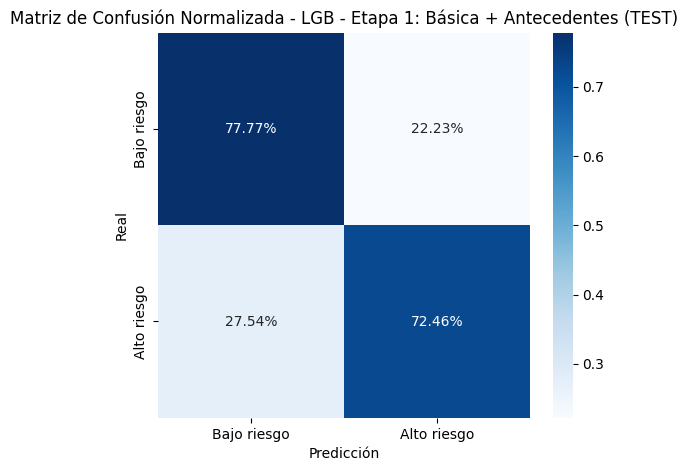

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   4454 non-null   float64
 1   genero                                 4454 non-null   int64  
 2   fumo_100_cigarrillos                   4454 non-null   int64  
 3   consumo_alcohol_ultimo_año_1.0         4454 non-null   float64
 4   actividad_deportiva_moderada_x_semana  4454 non-null   float64
 5   anhedonia_1.0                          4454 non-null   float64
 6   anhedonia_2.0                          4454 non-null   float64
 7   anhedonia_9.0                          4454 non-null   float64
 8   anhedonia_3.0                          4454 non-null   float64
 9   consumo_alcohol_ultimo_año_2.0         4454 non-null   float64
 10  consumo_alcohol_ultimo_año_3.0         4454 non-null   float64
 11  cons

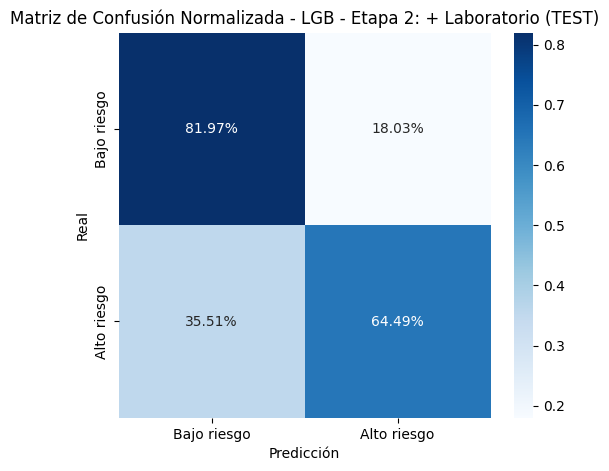


 RESUMEN FINAL POR ETAPAS (LIGHTGBM):
                            Etapa  auc_test  recall_test  precision_test
0  Etapa 1: Básica + Antecedentes  0.826042     0.724638        0.315457
1          Etapa 2: + Laboratorio  0.833022     0.644928        0.335849


,Etapa,auc_train,recall_train,precision_train,f1_train,auc_test,recall_test,precision_test,f1_test,auc_gap,recall_gap
0,Etapa 1: Básica + Antecedentes,0.976800,0.98915,0.429694,0.599124,0.826042,0.724638,0.315457,0.439560,0.150758,0.264512
1,Etapa 2: + Laboratorio,0.994449,1.00000,0.535853,0.697792,0.833022,0.644928,0.335849,0.441687,0.161427,0.355072


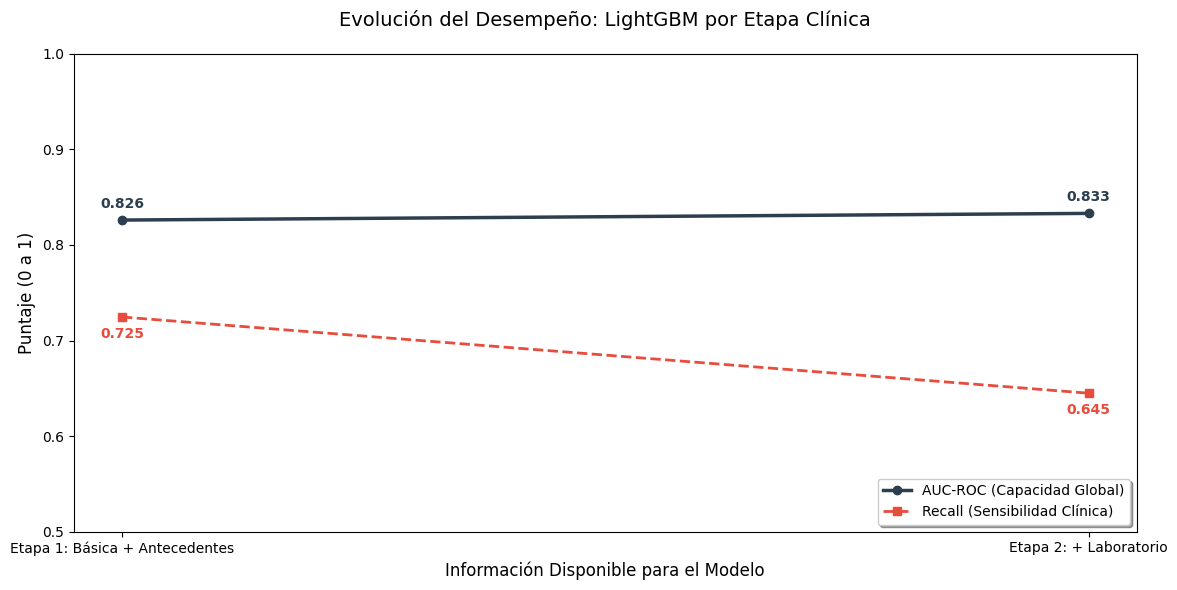

In [153]:
import lightgbm as lgb
import pandas as pd
import matplotlib.pyplot as plt


resultados_etapas_lgb = []
modelos_lgb_staged = []


for i in range(len(etapas)):

    X_train_etapa_lgb = X_train[etapas[i]].apply(pd.to_numeric, errors='coerce').fillna(0)
    X_test_etapa_lgb  = X_test[etapas[i]].apply(pd.to_numeric, errors='coerce').fillna(0)

    X_train_etapa_lgb.info()


    modelo_etapa_lgb = lgb.LGBMClassifier(
        n_estimators=500,
        max_depth=4,
        learning_rate=0.05,
        min_child_weight=5,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=(sum(y_train==0)/sum(y_train==1)),  # balanceo de clases
        objective='binary',
        random_state=42
    )

    # Entrenar modelo
    modelo_etapa_lgb.fit(X_train_etapa_lgb, y_train)

    # Guardar modelo entrenado
    modelos_lgb_staged.append(modelo_etapa_lgb)


    print(f"\n EVALUANDO CON LIGHTGBM: {nombres_etapas[i]}")
    metricas_lgb_etapa = evaluar_overfitting(
        modelo_etapa_lgb,
        X_train_etapa_lgb, y_train,
        X_test_etapa_lgb, y_test,
        threshold=0.4,
        nombre=f"LGB - {nombres_etapas[i]}"
    )

    # Guardar métricas
    resultados_etapas_lgb.append({"Etapa": nombres_etapas[i], **metricas_lgb_etapa})


df_etapas_lgb = pd.DataFrame(resultados_etapas_lgb)


for lgb_metrics_dict in resultados_etapas_lgb:
    lgb_metrics_for_global_results = lgb_metrics_dict.copy()
    lgb_metrics_for_global_results['Modelo'] = f"LightGBM - {lgb_metrics_for_global_results['Etapa']}"
    del lgb_metrics_for_global_results['Etapa']
    results.append(lgb_metrics_for_global_results)

print("\n RESUMEN FINAL POR ETAPAS (LIGHTGBM):")
print(df_etapas_lgb[['Etapa', 'auc_test', 'recall_test', 'precision_test']])
display(df_etapas_lgb)

# --- Gráfica de evolución ---
plt.figure(figsize=(12, 6))

plt.plot(df_etapas_lgb['Etapa'], df_etapas_lgb['auc_test'],
         marker='o', linestyle='-', color='#2c3e50', linewidth=2.5, label='AUC-ROC (Capacidad Global)')

plt.plot(df_etapas_lgb['Etapa'], df_etapas_lgb['recall_test'],
         marker='s', linestyle='--', color='#e74c3c', linewidth=2, label='Recall (Sensibilidad Clínica)')

plt.title('Evolución del Desempeño: LightGBM por Etapa Clínica', fontsize=14, pad=20)
plt.ylabel('Puntaje (0 a 1)', fontsize=12)
plt.xlabel('Información Disponible para el Modelo', fontsize=12)
plt.ylim(0.5, 1.0)
plt.legend(loc='lower right', frameon=True, shadow=True)


for x_val, auc_val, recall_val in zip(df_etapas_lgb['Etapa'], df_etapas_lgb['auc_test'], df_etapas_lgb['recall_test']):
    plt.text(x_val, auc_val + 0.01, f'{auc_val:.3f}', ha='center', va='bottom', fontweight='bold', color='#2c3e50')
    plt.text(x_val, recall_val - 0.01, f'{recall_val:.3f}', ha='center', va='top', fontweight='bold', color='#e74c3c')

plt.tight_layout()
plt.show()

In [154]:
!pip install catboost

In [155]:
# from catboost import CatBoostClassifier
# import pandas as pd
# import matplotlib.pyplot as plt

# # --- Inicializar listas para resultados y modelos ---
# resultados_etapas_cat = []
# modelos_cat_staged = []

# # --- Loop por etapas para entrenar CatBoost ---
# for i in range(len(etapas)):
#     # Seleccionar features de la etapa actual
#     X_train_etapa_cat = X_train[etapas[i]].apply(pd.to_numeric, errors='coerce').fillna(0)
#     X_test_etapa_cat  = X_test[etapas[i]].apply(pd.to_numeric, errors='coerce').fillna(0)

#     X_train_etapa_cat.info()

#     # Configurar modelo CatBoost
#     modelo_etapa_cat = CatBoostClassifier(
#         iterations=500,
#         depth=4,
#         learning_rate=0.05,
#         min_data_in_leaf=5,
#         subsample=0.8,
#         colsample_bylevel=0.8,
#         scale_pos_weight=(sum(y_train==0)/sum(y_train==1)),  # balanceo de clases
#         cat_features=[],  # No usamos características categóricas explícitamente
#         verbose=200,  # Esto imprime información cada 200 iteraciones
#         random_state=42
#     )

#     # Entrenar modelo
#     modelo_etapa_cat.fit(X_train_etapa_cat, y_train)

#     # Guardar modelo entrenado
#     modelos_cat_staged.append(modelo_etapa_cat)

#     # Evaluar overfitting
#     print(f"\n❕ EVALUANDO CON CATBOOST: {nombres_etapas[i]}")
#     metricas_cat_etapa = evaluar_overfitting(
#         modelo_etapa_cat,
#         X_train_etapa_cat, y_train,
#         X_test_etapa_cat, y_test,
#         threshold=0.4,
#         nombre=f"CAT - {nombres_etapas[i]}"
#     )

#     # Guardar métricas
#     resultados_etapas_cat.append({"Etapa": nombres_etapas[i], **metricas_cat_etapa})

# # --- DataFrame resumen ---
# df_etapas_cat = pd.DataFrame(resultados_etapas_cat)

# # --- Agregar resultados a la lista global 'results' ---
# for cat_metrics_dict in resultados_etapas_cat:
#     cat_metrics_for_global_results = cat_metrics_dict.copy()
#     cat_metrics_for_global_results['Modelo'] = f"CatBoost - {cat_metrics_for_global_results['Etapa']}"
#     del cat_metrics_for_global_results['Etapa']
#     results.append(cat_metrics_for_global_results)

# print("\n RESUMEN FINAL POR ETAPAS (CATBOOST):")
# print(df_etapas_cat[['Etapa', 'auc_test', 'recall_test', 'precision_test']])
# display(df_etapas_cat)

# # --- Gráfica de evolución ---
# plt.figure(figsize=(12, 6))

# plt.plot(df_etapas_cat['Etapa'], df_etapas_cat['auc_test'],
#          marker='o', linestyle='-', color='#2c3e50', linewidth=2.5, label='AUC-ROC (Capacidad Global)')

# plt.plot(df_etapas_cat['Etapa'], df_etapas_cat['recall_test'],
#          marker='s', linestyle='--', color='#e74c3c', linewidth=2, label='Recall (Sensibilidad Clínica)')

# plt.title('Evolución del Desempeño: CatBoost por Etapa Clínica', fontsize=14, pad=20)
# plt.ylabel('Puntaje (0 a 1)', fontsize=12)
# plt.xlabel('Información Disponible para el Modelo', fontsize=12)
# plt.ylim(0.5, 1.0)
# plt.legend(loc='lower right', frameon=True, shadow=True)

# # Anotar los puntos con sus valores
# for x_val, auc_val, recall_val in zip(df_etapas_cat['Etapa'], df_etapas_cat['auc_test'], df_etapas_cat['recall_test']):
#     plt.text(x_val, auc_val + 0.01, f'{auc_val:.3f}', ha='center', va='bottom', fontweight='bold', color='#2c3e50')
#     plt.text(x_val, recall_val - 0.01, f'{recall_val:.3f}', ha='center', va='top', fontweight='bold', color='#e74c3c')

# plt.tight_layout()
# plt.show()

In [156]:
# from catboost import CatBoostClassifier
# import pandas as pd
# import matplotlib.pyplot as plt

# # --- Inicializar listas para resultados y modelos ---
# resultados_etapas_cat = []
# modelos_cat_staged = []

# # --- Loop por etapas para entrenar CatBoost ---
# for i in range(len(etapas)):
#     # Seleccionar features de la etapa actual
#     X_train_etapa_cat = X_train[etapas[i]].apply(pd.to_numeric, errors='coerce').fillna(0)
#     X_test_etapa_cat  = X_test[etapas[i]].apply(pd.to_numeric, errors='coerce').fillna(0)

#     X_train_etapa_cat.info()

#     # Configurar modelo CatBoost
#     modelo_etapa_cat = CatBoostClassifier(
#       iterations=500,
#       depth=4,
#       learning_rate=0.05,
#       min_data_in_leaf=10,  # Aumentar para evitar árboles muy específicos
#       l2_leaf_reg=5,        # Añadir regularización L2
#       subsample=0.8,
#       colsample_bylevel=0.8,
#       scale_pos_weight=(sum(y_train==0)/sum(y_train==1)),
#       cat_features=[],
#       verbose=200,
#       random_state=42
#     )

#     # Entrenar modelo
#     modelo_etapa_cat.fit(X_train_etapa_cat, y_train)

#     # Guardar modelo entrenado
#     modelos_cat_staged.append(modelo_etapa_cat)

#     # Evaluar overfitting
#     print(f"\n❕ EVALUANDO CON CATBOOST: {nombres_etapas[i]}")
#     metricas_cat_etapa = evaluar_overfitting(
#         modelo_etapa_cat,
#         X_train_etapa_cat, y_train,
#         X_test_etapa_cat, y_test,
#         threshold=0.4,
#         nombre=f"CAT - {nombres_etapas[i]}"
#     )

#     # Guardar métricas
#     resultados_etapas_cat.append({"Etapa": nombres_etapas[i], **metricas_cat_etapa})

# # --- DataFrame resumen ---
# df_etapas_cat = pd.DataFrame(resultados_etapas_cat)

# # --- Agregar resultados a la lista global 'results' ---
# for cat_metrics_dict in resultados_etapas_cat:
#     cat_metrics_for_global_results = cat_metrics_dict.copy()
#     cat_metrics_for_global_results['Modelo'] = f"CatBoost - {cat_metrics_for_global_results['Etapa']}"
#     del cat_metrics_for_global_results['Etapa']
#     results.append(cat_metrics_for_global_results)

# print("\n RESUMEN FINAL POR ETAPAS (CATBOOST):")
# print(df_etapas_cat[['Etapa', 'auc_test', 'recall_test', 'precision_test']])
# display(df_etapas_cat)

# # --- Gráfica de evolución ---
# plt.figure(figsize=(12, 6))

# plt.plot(df_etapas_cat['Etapa'], df_etapas_cat['auc_test'],
#          marker='o', linestyle='-', color='#2c3e50', linewidth=2.5, label='AUC-ROC (Capacidad Global)')

# plt.plot(df_etapas_cat['Etapa'], df_etapas_cat['recall_test'],
#          marker='s', linestyle='--', color='#e74c3c', linewidth=2, label='Recall (Sensibilidad Clínica)')

# plt.title('Evolución del Desempeño: CatBoost por Etapa Clínica', fontsize=14, pad=20)
# plt.ylabel('Puntaje (0 a 1)', fontsize=12)
# plt.xlabel('Información Disponible para el Modelo', fontsize=12)
# plt.ylim(0.5, 1.0)
# plt.legend(loc='lower right', frameon=True, shadow=True)

# # Anotar los puntos con sus valores
# for x_val, auc_val, recall_val in zip(df_etapas_cat['Etapa'], df_etapas_cat['auc_test'], df_etapas_cat['recall_test']):
#     plt.text(x_val, auc_val + 0.01, f'{auc_val:.3f}', ha='center', va='bottom', fontweight='bold', color='#2c3e50')
#     plt.text(x_val, recall_val - 0.01, f'{recall_val:.3f}', ha='center', va='top', fontweight='bold', color='#e74c3c')

# plt.tight_layout()
# plt.show()

In [157]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [158]:
# Definir estrategia de balanceo
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Ajusta ratio a 0.5 por ejemplo
undersample = RandomUnderSampler(sampling_strategy=1.0, random_state=42)  # Igualar clases

balanceo_pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])

0:	learn: 0.6766499	test: 0.6735532	best: 0.6735532 (0)	total: 4.84ms	remaining: 7.26s
100:	learn: 0.3510644	test: 0.3263520	best: 0.3263520 (100)	total: 932ms	remaining: 12.9s
200:	learn: 0.3078508	test: 0.3066293	best: 0.3066293 (200)	total: 2.02s	remaining: 13.1s
300:	learn: 0.2844627	test: 0.2997935	best: 0.2997935 (300)	total: 3.44s	remaining: 13.7s
400:	learn: 0.2678288	test: 0.2961348	best: 0.2961348 (400)	total: 5.13s	remaining: 14.1s
500:	learn: 0.2544584	test: 0.2943663	best: 0.2942695 (494)	total: 7.18s	remaining: 14.3s
600:	learn: 0.2449462	test: 0.2932877	best: 0.2932877 (600)	total: 8.58s	remaining: 12.8s
700:	learn: 0.2355710	test: 0.2927059	best: 0.2926908 (675)	total: 9.36s	remaining: 10.7s
800:	learn: 0.2278852	test: 0.2922971	best: 0.2922792 (797)	total: 10.4s	remaining: 9.06s
900:	learn: 0.2202389	test: 0.2923354	best: 0.2920195 (873)	total: 11.6s	remaining: 7.69s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.2920195253
bestIteration = 873

Shr

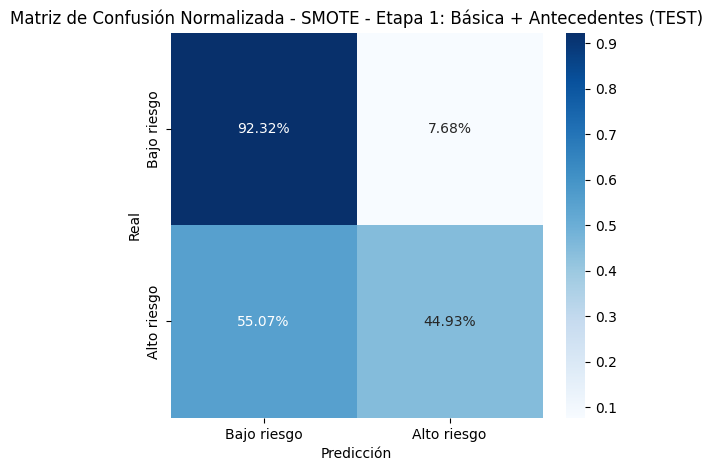

0:	learn: 0.6766059	test: 0.6736516	best: 0.6736516 (0)	total: 17ms	remaining: 25.5s
100:	learn: 0.3221653	test: 0.3172842	best: 0.3172842 (100)	total: 1.57s	remaining: 21.8s
200:	learn: 0.2771694	test: 0.2958764	best: 0.2958764 (200)	total: 3.25s	remaining: 21s
300:	learn: 0.2563224	test: 0.2904224	best: 0.2904224 (300)	total: 5.04s	remaining: 20.1s
400:	learn: 0.2417484	test: 0.2872880	best: 0.2872880 (400)	total: 8.05s	remaining: 22.1s
500:	learn: 0.2299380	test: 0.2859910	best: 0.2859910 (500)	total: 10.6s	remaining: 21.1s
600:	learn: 0.2199733	test: 0.2854809	best: 0.2854498 (599)	total: 12.9s	remaining: 19.4s
700:	learn: 0.2090359	test: 0.2848136	best: 0.2848136 (700)	total: 14.6s	remaining: 16.6s
800:	learn: 0.1992460	test: 0.2836230	best: 0.2836230 (800)	total: 15.9s	remaining: 13.9s
900:	learn: 0.1908404	test: 0.2839663	best: 0.2833586 (859)	total: 17.1s	remaining: 11.4s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.2833586141
bestIteration = 859

Shrink 

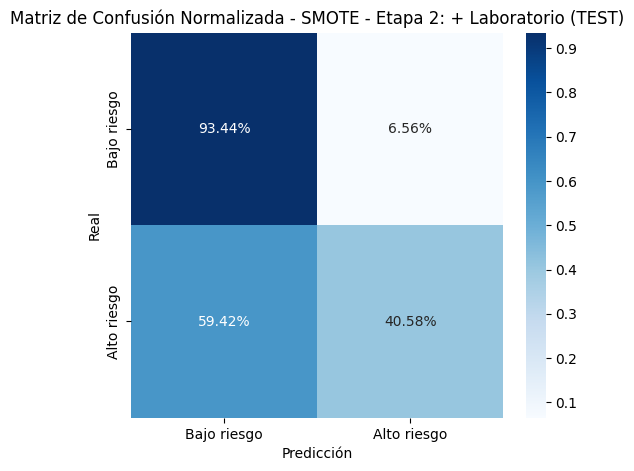


 RESUMEN FINAL POR ETAPAS (SMOTE):
                            Etapa  auc_test  recall_test  precision_test
0  Etapa 1: Básica + Antecedentes  0.843898     0.449275        0.452555
1          Etapa 2: + Laboratorio  0.851776     0.405797        0.466667


,Etapa,auc_train,recall_train,precision_train,f1_train,auc_test,recall_test,precision_test,f1_test,auc_gap,recall_gap
0,Etapa 1: Básica + Antecedentes,0.965447,0.851282,0.858436,0.854844,0.843898,0.449275,0.452555,0.450909,0.121549,0.402007
1,Etapa 2: + Laboratorio,0.976439,0.873077,0.894288,0.883555,0.851776,0.405797,0.466667,0.434109,0.124663,0.467280


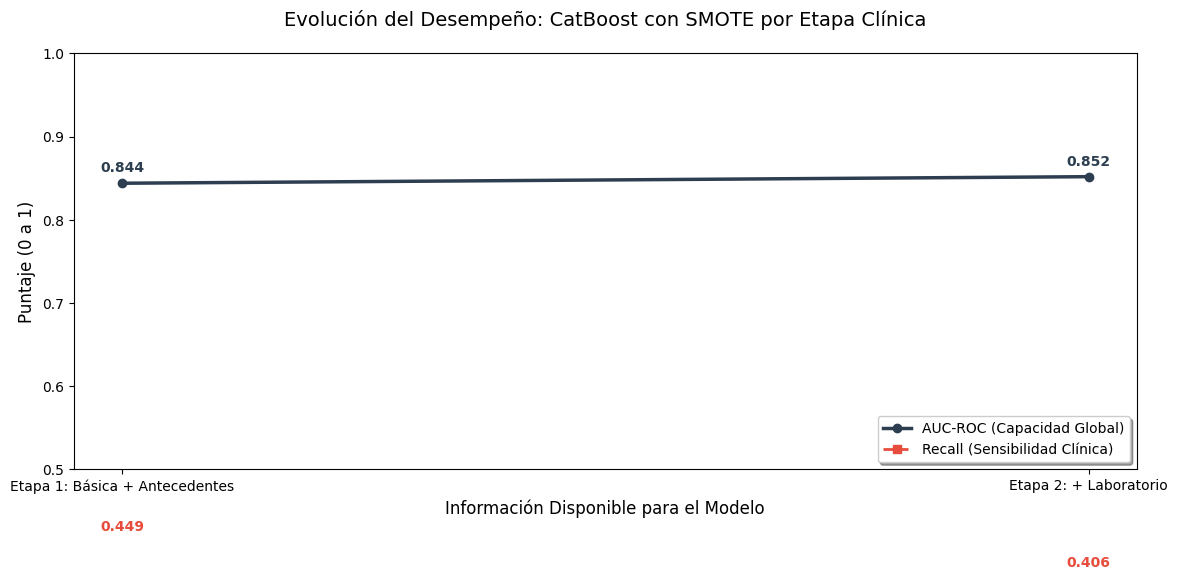

In [159]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
import pandas as pd
import matplotlib.pyplot as plt

# --- Inicializar listas para resultados y modelos ---
resultados_etapas_smote = []
modelos_smote_staged = []

# --- Loop por etapas para entrenar CatBoost con SMOTE ---
for i in range(len(etapas)):
    # Seleccionar features de la etapa actual
    X_train_etapa_smote = X_train[etapas[i]].apply(pd.to_numeric, errors='coerce').fillna(0)
    X_test_etapa_smote  = X_test[etapas[i]].apply(pd.to_numeric, errors='coerce').fillna(0)

    # Balanceo con SMOTE (solo en entrenamiento)
    smote = SMOTE(sampling_strategy=0.4, random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_etapa_smote, y_train)

    # Configurar modelo CatBoost
    modelo_etapa_smote = CatBoostClassifier(
        iterations=1500,
        depth=5,                   # Reducido de 8 a 5 para evitar memorizar ruido sintético
        learning_rate=0.02,        # Un ritmo más pausado para una mejor convergencia
        min_data_in_leaf=30,       # Aumentado para mayor estabilidad clínica
        l2_leaf_reg=15,            # Regularización fuerte
        subsample=0.8,
        colsample_bylevel=0.8,
        early_stopping_rounds=50,  # Freno automático basado en datos reales
        random_state=42,
        verbose=100
    )


    #  modelo_etapa_smote = CatBoostClassifier(
    #     iterations=500,
    #     depth=4,
    #     learning_rate=0.05,
    #     min_data_in_leaf=10,
    #     l2_leaf_reg=5,
    #     subsample=0.8,
    #     colsample_bylevel=0.8,
    #     cat_features=[],
    #     verbose=200,
    #     random_state=42
    # )


    # Entrenar modelo con SMOTE
    modelo_etapa_smote.fit(
        X_train_resampled, y_train_resampled,
        eval_set=(X_test_etapa_smote, y_test),
        use_best_model=True
    )

    # Guardar modelo entrenado
    modelos_smote_staged.append(modelo_etapa_smote)

    # Evaluar overfitting
    print(f"\n❕ EVALUANDO CON CATBOOST (SMOTE): {nombres_etapas[i]}")
    metricas_smote_etapa = evaluar_overfitting(
        modelo_etapa_smote,
        X_train_resampled, y_train_resampled,
        X_test_etapa_smote, y_test,
        threshold=0.4,
        nombre=f"SMOTE - {nombres_etapas[i]}"
    )

    # Guardar métricas
    resultados_etapas_smote.append({"Etapa": nombres_etapas[i], **metricas_smote_etapa})

# --- DataFrame resumen ---
df_etapas_smote = pd.DataFrame(resultados_etapas_smote)

# --- Agregar resultados a la lista global 'results' ---
for smote_metrics_dict in resultados_etapas_smote:
    smote_metrics_for_global_results = smote_metrics_dict.copy()
    smote_metrics_for_global_results['Modelo'] = f"CatBoost (SMOTE) - {smote_metrics_for_global_results['Etapa']}"
    del smote_metrics_for_global_results['Etapa']
    results.append(smote_metrics_for_global_results)

print("\n RESUMEN FINAL POR ETAPAS (SMOTE):")
print(df_etapas_smote[['Etapa', 'auc_test', 'recall_test', 'precision_test']])
display(df_etapas_smote)

# --- Gráfica de evolución ---
plt.figure(figsize=(12, 6))

plt.plot(df_etapas_smote['Etapa'], df_etapas_smote['auc_test'],
         marker='o', linestyle='-', color='#2c3e50', linewidth=2.5, label='AUC-ROC (Capacidad Global)')

plt.plot(df_etapas_smote['Etapa'], df_etapas_smote['recall_test'],
         marker='s', linestyle='--', color='#e74c3c', linewidth=2, label='Recall (Sensibilidad Clínica)')

plt.title('Evolución del Desempeño: CatBoost con SMOTE por Etapa Clínica', fontsize=14, pad=20)
plt.ylabel('Puntaje (0 a 1)', fontsize=12)
plt.xlabel('Información Disponible para el Modelo', fontsize=12)
plt.ylim(0.5, 1.0)
plt.legend(loc='lower right', frameon=True, shadow=True)

# Anotar los puntos con sus valores
for x_val, auc_val, recall_val in zip(df_etapas_smote['Etapa'], df_etapas_smote['auc_test'], df_etapas_smote['recall_test']):
    plt.text(x_val, auc_val + 0.01, f'{auc_val:.3f}', ha='center', va='bottom', fontweight='bold', color='#2c3e50')
    plt.text(x_val, recall_val - 0.01, f'{recall_val:.3f}', ha='center', va='top', fontweight='bold', color='#e74c3c')

plt.tight_layout()
plt.show()


❕ EVALUANDO CON CATBOOST (Undersampling): Etapa 1: Básica + Antecedentes

===== Undersampling - Etapa 1: Básica + Antecedentes ====
---- TRAIN ----
AUC: 0.8995
Recall: 0.5298
Precision: 0.6705
F1: 0.5919

---- TEST ----
AUC: 0.8501
Recall: 0.3986
Precision: 0.4583
F1: 0.4264

---- GAP (Train-Test) ----
AUC gap: 0.0494
Recall gap: 0.1313


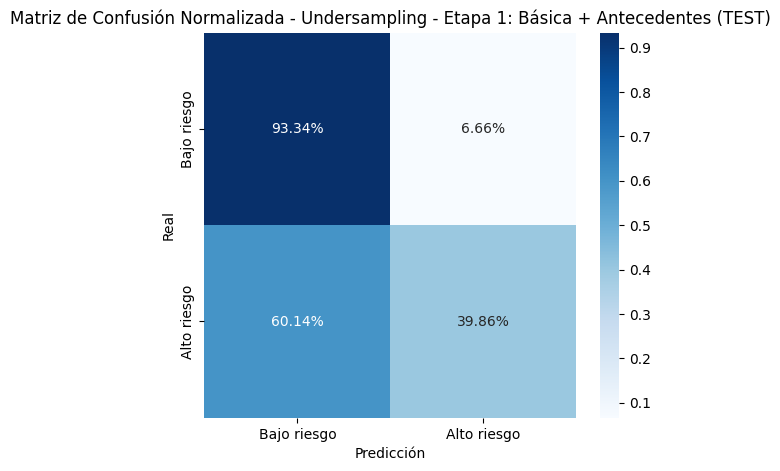


❕ EVALUANDO CON CATBOOST (Undersampling): Etapa 2: + Laboratorio

===== Undersampling - Etapa 2: + Laboratorio ====
---- TRAIN ----
AUC: 0.9190
Recall: 0.6094
Precision: 0.7140
F1: 0.6576

---- TEST ----
AUC: 0.8564
Recall: 0.4130
Precision: 0.4597
F1: 0.4351

---- GAP (Train-Test) ----
AUC gap: 0.0626
Recall gap: 0.1964


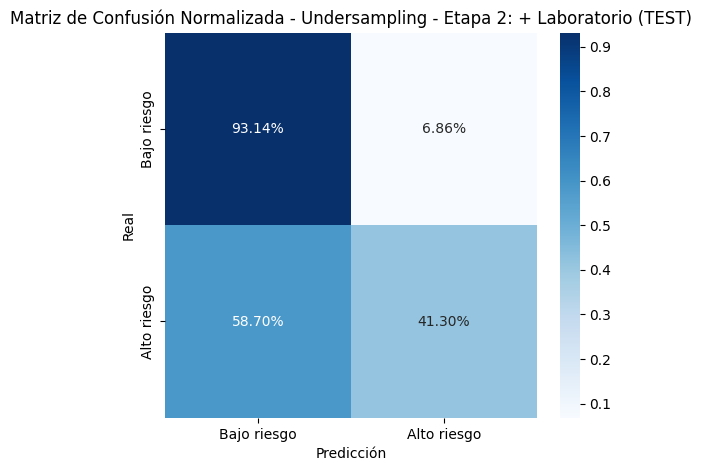


 RESUMEN FINAL POR ETAPAS (Undersampling):
                            Etapa  auc_test  recall_test  precision_test
0  Etapa 1: Básica + Antecedentes  0.850053     0.398551        0.458333
1          Etapa 2: + Laboratorio  0.856394     0.413043        0.459677


,Etapa,auc_train,recall_train,precision_train,f1_train,auc_test,recall_test,precision_test,f1_test,auc_gap,recall_gap
0,Etapa 1: Básica + Antecedentes,0.899481,0.529837,0.670481,0.591919,0.850053,0.398551,0.458333,0.426357,0.049428,0.131287
1,Etapa 2: + Laboratorio,0.919007,0.609403,0.713983,0.657561,0.856394,0.413043,0.459677,0.435115,0.062613,0.196360


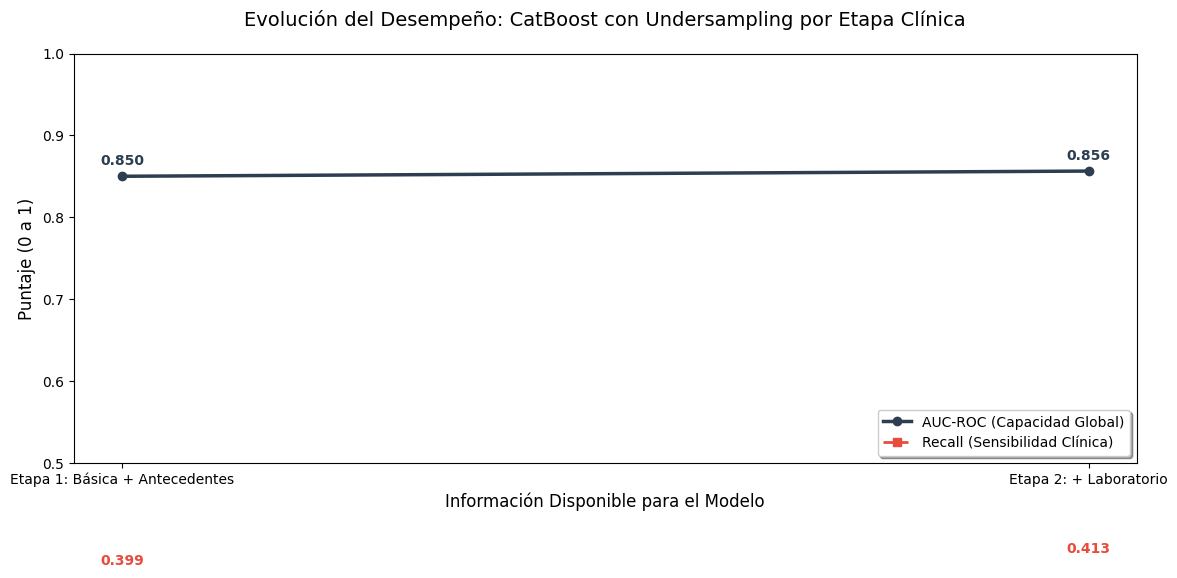

In [160]:
from imblearn.under_sampling import RandomUnderSampler

# --- Inicializar listas para resultados y modelos ---
resultados_etapas_under = []
modelos_under_staged = []

# --- Loop por etapas para entrenar CatBoost con Undersampling ---
for i in range(len(etapas)):
    # Seleccionar features de la etapa actual
    X_train_etapa_under = X_train[etapas[i]].apply(pd.to_numeric, errors='coerce').fillna(0)
    X_test_etapa_under  = X_test[etapas[i]].apply(pd.to_numeric, errors='coerce').fillna(0)

    # Balanceo con Undersampling (solo en entrenamiento)
    undersampler = RandomUnderSampler(sampling_strategy=0.2, random_state=42)  # Reducir clase mayoritaria
    X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_etapa_under, y_train)

    # Configurar modelo CatBoost
    modelo_etapa_under = CatBoostClassifier(
        iterations=1500,           # Más iteraciones pero controladas por early stopping
        depth=5,                   # Reducimos profundidad para generalizar mejor
        learning_rate=0.01,        # Aprendizaje más lento y estable
        min_data_in_leaf=25,       # Evita memorizar individuos únicos
        l2_leaf_reg=15,            # Penalización fuerte para simplificar el modelo
        subsample=0.8,
        colsample_bylevel=0.8,
        early_stopping_rounds=50,  # Freno automático
        verbose=0,
        random_state=42
    )

    #    modelo_etapa_under = CatBoostClassifier(
    #     iterations=500,
    #     depth=4,
    #     learning_rate=0.05,
    #     min_data_in_leaf=10,
    #     l2_leaf_reg=5,
    #     subsample=0.8,
    #     colsample_bylevel=0.8,
    #     cat_features=[],
    #     verbose=200,
    #     random_state=42
    # )


    # Entrenar modelo con Undersampling
    modelo_etapa_under.fit(
        X_train_resampled, y_train_resampled,
        eval_set=(X_test_etapa_under, y_test),
        use_best_model=True
    )

    # Guardar modelo entrenado
    modelos_under_staged.append(modelo_etapa_under)

    # Evaluar overfitting
    print(f"\n❕ EVALUANDO CON CATBOOST (Undersampling): {nombres_etapas[i]}")
    metricas_under_etapa = evaluar_overfitting(
        modelo_etapa_under,
        X_train_resampled, y_train_resampled,
        X_test_etapa_under, y_test,
        threshold=0.4,
        nombre=f"Undersampling - {nombres_etapas[i]}"
    )

    # Guardar métricas
    resultados_etapas_under.append({"Etapa": nombres_etapas[i], **metricas_under_etapa})

# --- DataFrame resumen ---
df_etapas_under = pd.DataFrame(resultados_etapas_under)

# --- Agregar resultados a la lista global 'results' ---
for under_metrics_dict in resultados_etapas_under:
    under_metrics_for_global_results = under_metrics_dict.copy()
    under_metrics_for_global_results['Modelo'] = f"CatBoost (Undersampling) - {under_metrics_for_global_results['Etapa']}"
    del under_metrics_for_global_results['Etapa']
    results.append(under_metrics_for_global_results)

print("\n RESUMEN FINAL POR ETAPAS (Undersampling):")
print(df_etapas_under[['Etapa', 'auc_test', 'recall_test', 'precision_test']])
display(df_etapas_under)

# --- Gráfica de evolución ---
plt.figure(figsize=(12, 6))

plt.plot(df_etapas_under['Etapa'], df_etapas_under['auc_test'],
         marker='o', linestyle='-', color='#2c3e50', linewidth=2.5, label='AUC-ROC (Capacidad Global)')

plt.plot(df_etapas_under['Etapa'], df_etapas_under['recall_test'],
         marker='s', linestyle='--', color='#e74c3c', linewidth=2, label='Recall (Sensibilidad Clínica)')

plt.title('Evolución del Desempeño: CatBoost con Undersampling por Etapa Clínica', fontsize=14, pad=20)
plt.ylabel('Puntaje (0 a 1)', fontsize=12)
plt.xlabel('Información Disponible para el Modelo', fontsize=12)
plt.ylim(0.5, 1.0)
plt.legend(loc='lower right', frameon=True, shadow=True)

# Anotar los puntos con sus valores
for x_val, auc_val, recall_val in zip(df_etapas_under['Etapa'], df_etapas_under['auc_test'], df_etapas_under['recall_test']):
    plt.text(x_val, auc_val + 0.01, f'{auc_val:.3f}', ha='center', va='bottom', fontweight='bold', color='#2c3e50')
    plt.text(x_val, recall_val - 0.01, f'{recall_val:.3f}', ha='center', va='top', fontweight='bold', color='#e74c3c')

plt.tight_layout()
plt.show()


Balance de clases tras SMOTE en Etapa 1: Básica + Antecedentes:
Clases originales: 3901 (Clase 0), 553 (Clase 1)
Clases tras SMOTE: 3901 (Clase 0), 3901 (Clase 1)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [04:22:51] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



❕ EVALUANDO CON XGBOOST (SMOTE): Etapa 1: Básica + Antecedentes

===== XGB (SMOTE) - Etapa 1: Básica + Antecedentes ====
---- TRAIN ----
AUC: 0.9896
Recall: 0.9526
Precision: 0.9332
F1: 0.9428

---- TEST ----
AUC: 0.8344
Recall: 0.4710
Precision: 0.4012
F1: 0.4333

---- GAP (Train-Test) ----
AUC gap: 0.1552
Recall gap: 0.4816


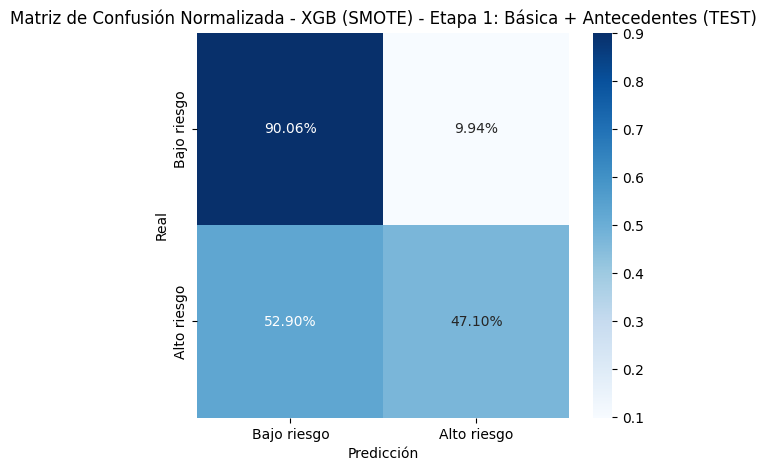

Balance de clases tras SMOTE en Etapa 2: + Laboratorio:
Clases originales: 3901 (Clase 0), 553 (Clase 1)
Clases tras SMOTE: 3901 (Clase 0), 3901 (Clase 1)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [04:23:05] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



❕ EVALUANDO CON XGBOOST (SMOTE): Etapa 2: + Laboratorio

===== XGB (SMOTE) - Etapa 2: + Laboratorio ====
---- TRAIN ----
AUC: 0.9956
Recall: 0.9705
Precision: 0.9638
F1: 0.9672

---- TEST ----
AUC: 0.8433
Recall: 0.4565
Precision: 0.4632
F1: 0.4599

---- GAP (Train-Test) ----
AUC gap: 0.1523
Recall gap: 0.5140


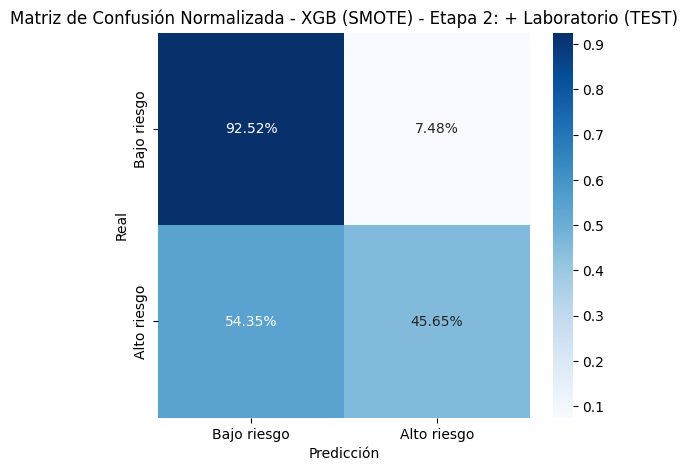


 RESUMEN FINAL POR ETAPAS (XGBOOST con SMOTE):
                            Etapa  auc_test  recall_test  precision_test
0  Etapa 1: Básica + Antecedentes  0.834388     0.471014        0.401235
1          Etapa 2: + Laboratorio  0.843290     0.456522        0.463235


,Etapa,auc_train,recall_train,precision_train,f1_train,auc_test,recall_test,precision_test,f1_test,auc_gap,recall_gap
0,Etapa 1: Básica + Antecedentes,0.989581,0.952576,0.933199,0.942788,0.834388,0.471014,0.401235,0.433333,0.155193,0.481562
1,Etapa 2: + Laboratorio,0.995581,0.970520,0.963849,0.967173,0.843290,0.456522,0.463235,0.459854,0.152291,0.513999


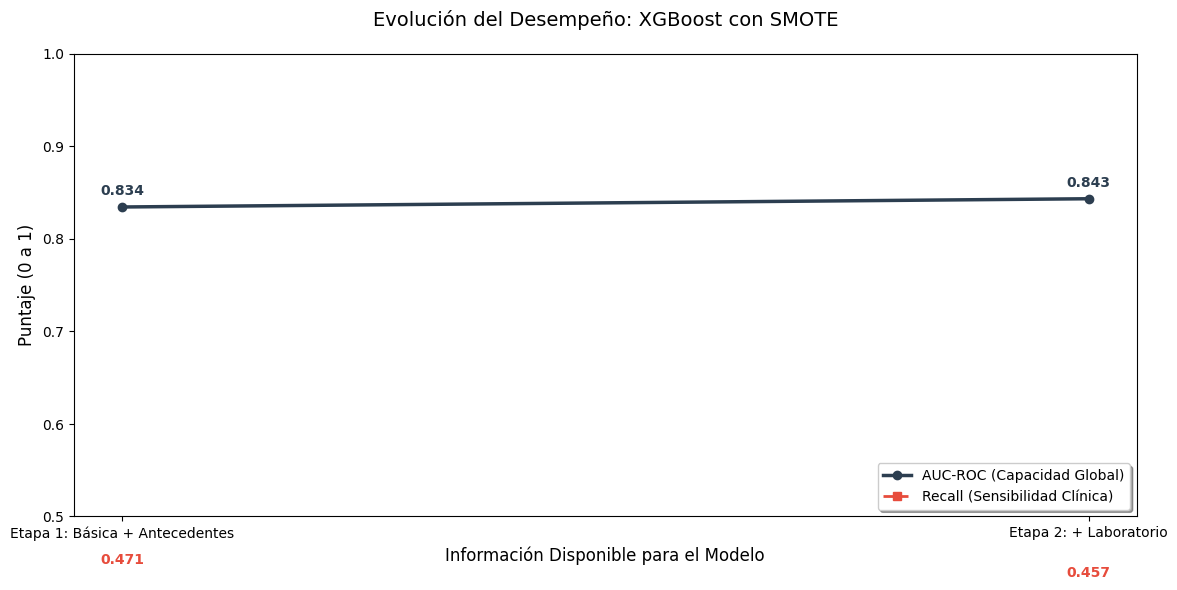

In [161]:
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# --- Inicializar listas para resultados y modelos ---
resultados_etapas_xgb_smote = []
modelos_xgb_staged_smote = []

# --- Loop por etapas para entrenar XGB con SMOTE ---
for i in range(len(etapas)):
    # Seleccionar features de la etapa actual
    X_train_etapa_xgb = X_train[etapas[i]].apply(pd.to_numeric, errors='coerce').fillna(0)
    X_test_etapa_xgb  = X_test[etapas[i]].apply(pd.to_numeric, errors='coerce').fillna(0)

    # Aplicar SMOTE para balanceo de clases
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train_etapa_xgb, y_train)

    # Información sobre el balanceo de clases
    print(f"Balance de clases tras SMOTE en {nombres_etapas[i]}:")
    print(f"Clases originales: {sum(y_train == 0)} (Clase 0), {sum(y_train == 1)} (Clase 1)")
    print(f"Clases tras SMOTE: {sum(y_resampled == 0)} (Clase 0), {sum(y_resampled == 1)} (Clase 1)")

    # Configurar modelo XGBClassifier
    modelo_etapa_xgb = XGBClassifier(
        n_estimators=500,
        max_depth=4,
        learning_rate=0.05,
        min_child_weight=5,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=(sum(y_resampled == 0) / sum(y_resampled == 1)),  # balanceo de clases
        use_label_encoder=False,  # evita warning
        eval_metric='auc',
        random_state=42
    )

    # Entrenar modelo con los datos balanceados
    modelo_etapa_xgb.fit(X_resampled, y_resampled)

    # Guardar modelo entrenado
    modelos_xgb_staged_smote.append(modelo_etapa_xgb)

    # Evaluar overfitting
    print(f"\n❕ EVALUANDO CON XGBOOST (SMOTE): {nombres_etapas[i]}")
    metricas_xgb_etapa = evaluar_overfitting(
        modelo_etapa_xgb,
        X_resampled, y_resampled,  # Usar X_resampled y y_resampled para evaluación
        X_test_etapa_xgb, y_test,
        threshold=0.4,
        nombre=f"XGB (SMOTE) - {nombres_etapas[i]}"
    )

    # Guardar métricas
    resultados_etapas_xgb_smote.append({"Etapa": nombres_etapas[i], **metricas_xgb_etapa})

# --- DataFrame resumen ---
df_etapas_xgb_smote = pd.DataFrame(resultados_etapas_xgb_smote)

# --- Agregar resultados a la lista global 'results' ---
for xgb_metrics_dict in resultados_etapas_xgb_smote:
    xgb_metrics_for_global_results = xgb_metrics_dict.copy()
    xgb_metrics_for_global_results['Modelo'] = f"XGBoost (SMOTE) - {xgb_metrics_for_global_results['Etapa']}"
    del xgb_metrics_for_global_results['Etapa']
    results.append(xgb_metrics_for_global_results)

print("\n RESUMEN FINAL POR ETAPAS (XGBOOST con SMOTE):")
print(df_etapas_xgb_smote[['Etapa', 'auc_test', 'recall_test', 'precision_test']])
display(df_etapas_xgb_smote)

# --- Gráfica de evolución ---
plt.figure(figsize=(12, 6))

plt.plot(df_etapas_xgb_smote['Etapa'], df_etapas_xgb_smote['auc_test'],
         marker='o', linestyle='-', color='#2c3e50', linewidth=2.5, label='AUC-ROC (Capacidad Global)')

plt.plot(df_etapas_xgb_smote['Etapa'], df_etapas_xgb_smote['recall_test'],
         marker='s', linestyle='--', color='#e74c3c', linewidth=2, label='Recall (Sensibilidad Clínica)')

plt.title('Evolución del Desempeño: XGBoost con SMOTE', fontsize=14, pad=20)
plt.ylabel('Puntaje (0 a 1)', fontsize=12)
plt.xlabel('Información Disponible para el Modelo', fontsize=12)
plt.ylim(0.5, 1.0)
plt.legend(loc='lower right', frameon=True, shadow=True)

# Anotar los puntos con sus valores
for x_val, auc_val, recall_val in zip(df_etapas_xgb_smote['Etapa'], df_etapas_xgb_smote['auc_test'], df_etapas_xgb_smote['recall_test']):
    plt.text(x_val, auc_val + 0.01, f'{auc_val:.3f}', ha='center', va='bottom', fontweight='bold', color='#2c3e50')
    plt.text(x_val, recall_val - 0.01, f'{recall_val:.3f}', ha='center', va='top', fontweight='bold', color='#e74c3c')

plt.tight_layout()
plt.show()

Balance de clases tras Undersampling en Etapa 1: Básica + Antecedentes:
Clases originales: 3901 (Clase 0), 553 (Clase 1)
Clases tras Undersampling: 553 (Clase 0), 553 (Clase 1)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [04:23:18] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



❕ EVALUANDO CON XGBOOST (Undersampling): Etapa 1: Básica + Antecedentes

===== XGB (Undersampling) - Etapa 1: Básica + Antecedentes ====
---- TRAIN ----
AUC: 0.9792
Recall: 0.9729
Precision: 0.8691
F1: 0.9181

---- TEST ----
AUC: 0.8215
Recall: 0.8188
Precision: 0.2562
F1: 0.3903

---- GAP (Train-Test) ----
AUC gap: 0.1577
Recall gap: 0.1540


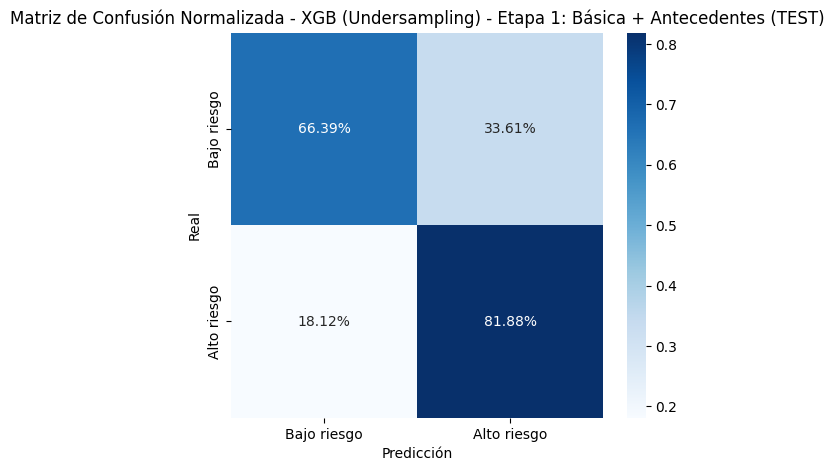

Balance de clases tras Undersampling en Etapa 2: + Laboratorio:
Clases originales: 3901 (Clase 0), 553 (Clase 1)
Clases tras Undersampling: 553 (Clase 0), 553 (Clase 1)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [04:23:20] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



❕ EVALUANDO CON XGBOOST (Undersampling): Etapa 2: + Laboratorio

===== XGB (Undersampling) - Etapa 2: + Laboratorio ====
---- TRAIN ----
AUC: 0.9978
Recall: 0.9964
Precision: 0.9355
F1: 0.9650

---- TEST ----
AUC: 0.8190
Recall: 0.7899
Precision: 0.2627
F1: 0.3942

---- GAP (Train-Test) ----
AUC gap: 0.1789
Recall gap: 0.2065


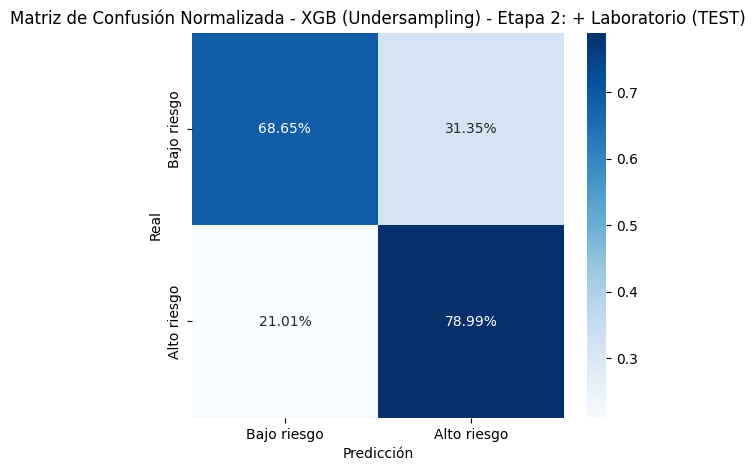


 RESUMEN FINAL POR ETAPAS (XGBOOST con Undersampling):
                            Etapa  auc_test  recall_test  precision_test
0  Etapa 1: Básica + Antecedentes  0.821513     0.818841        0.256236
1          Etapa 2: + Laboratorio  0.818974     0.789855        0.262651


,Etapa,auc_train,recall_train,precision_train,f1_train,auc_test,recall_test,precision_test,f1_test,auc_gap,recall_gap
0,Etapa 1: Básica + Antecedentes,0.979178,0.972875,0.869144,0.918089,0.821513,0.818841,0.256236,0.390328,0.157665,0.154035
1,Etapa 2: + Laboratorio,0.997839,0.996383,0.935484,0.964974,0.818974,0.789855,0.262651,0.394213,0.178864,0.206528


In [162]:
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import matplotlib.pyplot as plt

# --- Inicializar listas para resultados y modelos ---
resultados_etapas_xgb_under = []
modelos_xgb_staged_under = []

# --- Loop por etapas para entrenar XGB con Undersampling ---
for i in range(len(etapas)):
    # Seleccionar features de la etapa actual
    X_train_etapa_xgb = X_train[etapas[i]].apply(pd.to_numeric, errors='coerce').fillna(0)
    X_test_etapa_xgb  = X_test[etapas[i]].apply(pd.to_numeric, errors='coerce').fillna(0)

    # Aplicar Undersampling para balanceo de clases
    rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = rus.fit_resample(X_train_etapa_xgb, y_train)

    # Información sobre el balanceo de clases
    print(f"Balance de clases tras Undersampling en {nombres_etapas[i]}:")
    print(f"Clases originales: {sum(y_train == 0)} (Clase 0), {sum(y_train == 1)} (Clase 1)")
    print(f"Clases tras Undersampling: {sum(y_resampled == 0)} (Clase 0), {sum(y_resampled == 1)} (Clase 1)")

    # Configurar modelo XGBClassifier
    modelo_etapa_xgb = XGBClassifier(
        n_estimators=500,
        max_depth=4,
        learning_rate=0.05,
        min_child_weight=5,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=(sum(y_resampled == 0) / sum(y_resampled == 1)),
        use_label_encoder=False,
        eval_metric='auc',
        random_state=42
    )

    # Entrenar modelo con los datos balanceados
    modelo_etapa_xgb.fit(X_resampled, y_resampled)

    # Guardar modelo entrenado
    modelos_xgb_staged_under.append(modelo_etapa_xgb)

    # Evaluar overfitting
    print(f"\n❕ EVALUANDO CON XGBOOST (Undersampling): {nombres_etapas[i]}")
    metricas_xgb_etapa = evaluar_overfitting(
        modelo_etapa_xgb,
        X_resampled, y_resampled,
        X_test_etapa_xgb, y_test,
        threshold=0.4,
        nombre=f"XGB (Undersampling) - {nombres_etapas[i]}"
    )

    # Guardar métricas
    resultados_etapas_xgb_under.append({"Etapa": nombres_etapas[i], **metricas_xgb_etapa})

# --- DataFrame resumen ---
df_etapas_xgb_under = pd.DataFrame(resultados_etapas_xgb_under)

# --- Agregar resultados a la lista global 'results' ---
for xgb_metrics_dict in resultados_etapas_xgb_under:
    xgb_metrics_for_global_results = xgb_metrics_dict.copy()
    xgb_metrics_for_global_results['Modelo'] = f"XGBoost (Undersampling) - {xgb_metrics_for_global_results['Etapa']}"
    del xgb_metrics_for_global_results['Etapa']
    results.append(xgb_metrics_for_global_results)

print("\n RESUMEN FINAL POR ETAPAS (XGBOOST con Undersampling):")
print(df_etapas_xgb_under[['Etapa', 'auc_test', 'recall_test', 'precision_test']])
display(df_etapas_xgb_under)

mejor modelo


Info for Etapa 1: Básica + Antecedentes training data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   4454 non-null   float64
 1   genero                                 4454 non-null   int64  
 2   fumo_100_cigarrillos                   4454 non-null   int64  
 3   consumo_alcohol_ultimo_año_1.0         4454 non-null   float64
 4   actividad_deportiva_moderada_x_semana  4454 non-null   float64
 5   anhedonia_1.0                          4454 non-null   float64
 6   anhedonia_2.0                          4454 non-null   float64
 7   anhedonia_9.0                          4454 non-null   float64
 8   anhedonia_3.0                          4454 non-null   float64
 9   consumo_alcohol_ultimo_año_2.0         4454 non-null   float64
 10  consumo_alcohol_

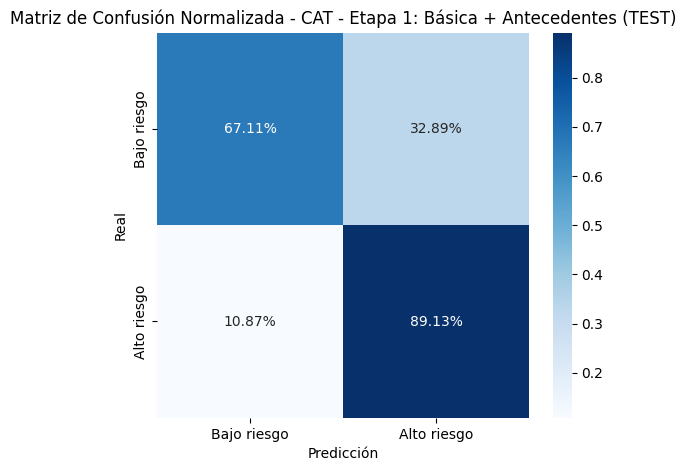


Info for Etapa 2: + Laboratorio training data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   4454 non-null   float64
 1   genero                                 4454 non-null   int64  
 2   fumo_100_cigarrillos                   4454 non-null   int64  
 3   consumo_alcohol_ultimo_año_1.0         4454 non-null   float64
 4   actividad_deportiva_moderada_x_semana  4454 non-null   float64
 5   anhedonia_1.0                          4454 non-null   float64
 6   anhedonia_2.0                          4454 non-null   float64
 7   anhedonia_9.0                          4454 non-null   float64
 8   anhedonia_3.0                          4454 non-null   float64
 9   consumo_alcohol_ultimo_año_2.0         4454 non-null   float64
 10  consumo_alcohol_ultimo_a

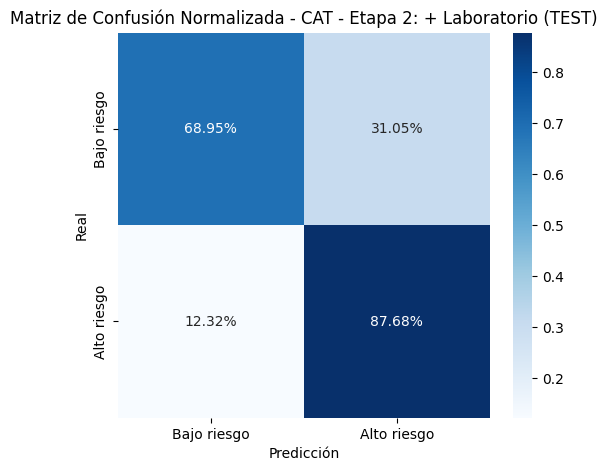


 RESUMEN FINAL POR ETAPAS (CATBOOST):
                            Etapa  auc_test  recall_test  precision_test  \
0  Etapa 1: Básica + Antecedentes  0.849252     0.891304        0.277027   
1          Etapa 2: + Laboratorio  0.857211     0.876812        0.285377   

   auc_cv_mean  
0     0.845358  
1     0.844139  


,Etapa,auc_train,recall_train,precision_train,f1_train,auc_test,recall_test,precision_test,f1_test,auc_gap,recall_gap,auc_cv_mean,auc_cv_std
0,Etapa 1: Básica + Antecedentes,0.886292,0.925859,0.278715,0.428452,0.849252,0.891304,0.277027,0.422680,0.037040,0.034555,0.845358,0.009422
1,Etapa 2: + Laboratorio,0.899706,0.927667,0.295677,0.448427,0.857211,0.876812,0.285377,0.430605,0.042495,0.050856,0.844139,0.011693


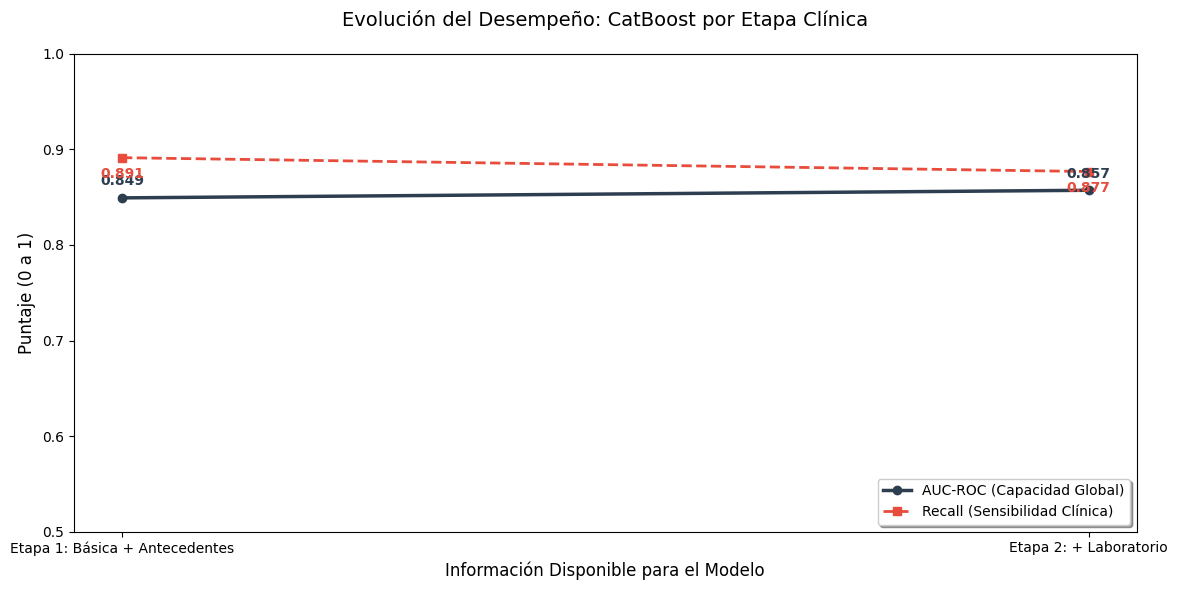

In [124]:
from catboost import CatBoostClassifier
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# --- Inicializar listas para resultados y modelos ---
resultados_etapas_cat = []
modelos_cat_staged = []

# --- Loop por etapas para entrenar CatBoost ---
for i in range(len(etapas)):
    # Seleccionar features de la etapa actual
    X_train_etapa_cat = X_train[etapas[i]].apply(pd.to_numeric, errors='coerce').fillna(0)
    X_test_etapa_cat  = X_test[etapas[i]].apply(pd.to_numeric, errors='coerce').fillna(0)

    print(f"\nInfo for {nombres_etapas[i]} training data:")
    X_train_etapa_cat.info()

    # Configurar modelo CatBoost
    modelo_etapa_cat = CatBoostClassifier(
      iterations=1000,           # Subimos iteraciones porque bajamos el learning_rate
      learning_rate=0.02,        # Aprendizaje más lento para no memorizar rápido
      depth=4,                   # Mantenemos árboles simples
      l2_leaf_reg=15,            # Aumentamos de 5 a 15 para penalizar la complejidad
      min_data_in_leaf=25,       # Aumentamos de 8 a 25 para evitar hojas con pocos pacientes
      subsample=0.8,
      colsample_bylevel=0.8,
      scale_pos_weight=(sum(y_train==0)/sum(y_train==1)),

      random_state=42,
      verbose=0                # Reportar progreso cada 100 pasos
    )

    # modelo_etapa_cat = CatBoostClassifier(
    #   iterations=500,
    #   depth=4,
    #   learning_rate=0.05,
    #   min_data_in_leaf=10,
    #   l2_leaf_reg=5,
    #   subsample=0.8,
    #   colsample_bylevel=0.8,
    #   cat_features=[],
    #   verbose=200,
    #   random_state=42
    # )

    # Inicializar StratifiedKFold para cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Realizar cross-validation y obtener scores
    cv_scores = cross_val_score(modelo_etapa_cat, X_train_etapa_cat, y_train, cv=skf, scoring='roc_auc', error_score='raise')

    auc_cv_mean = cv_scores.mean()
    auc_cv_std = cv_scores.std()
    print(f"AUC (Cross-Validation) - Mean: {auc_cv_mean:.4f}, Std: {auc_cv_std:.4f}")

    # Entrenar modelo
    modelo_etapa_cat.fit(
        X_train_etapa_cat, y_train,
        eval_set=(X_test_etapa_cat, y_test),
        use_best_model=True      # Al final, se queda con la iteración que mejor le fue al TEST
    )

    # Guardar modelo entrenado
    modelos_cat_staged.append(modelo_etapa_cat)

    # Guardar el modelo en un archivo .joblib
    filename = f'/content/drive/My Drive/NHANES/modelo_catboost_etapa{i+1}.joblib'
    joblib.dump(modelo_etapa_cat, filename)
    print(f"Modelo guardado como: {filename}")

    # Evaluar overfitting
    print(f"\n❕ EVALUANDO CON CATBOOST: {nombres_etapas[i]}")
    metricas_cat_etapa = evaluar_overfitting(
        modelo_etapa_cat,
        X_train_etapa_cat, y_train,
        X_test_etapa_cat, y_test,
        threshold=0.4,
        nombre=f"CAT - {nombres_etapas[i]}"
    )

    # Guardar métricas, incluyendo los resultados de CV
    resultados_etapas_cat.append({"Etapa": nombres_etapas[i], **metricas_cat_etapa, "auc_cv_mean": auc_cv_mean, "auc_cv_std": auc_cv_std})

# --- DataFrame resumen ---
df_etapas_cat = pd.DataFrame(resultados_etapas_cat)

# --- Agregar resultados a la lista global 'results' ---
for cat_metrics_dict in resultados_etapas_cat:
    cat_metrics_for_global_results = cat_metrics_dict.copy()
    cat_metrics_for_global_results['Modelo'] = f"CatBoost - {cat_metrics_for_global_results['Etapa']}"
    del cat_metrics_for_global_results['Etapa']
    results.append(cat_metrics_for_global_results)

print("\n RESUMEN FINAL POR ETAPAS (CATBOOST):")
print(df_etapas_cat[['Etapa', 'auc_test', 'recall_test', 'precision_test', 'auc_cv_mean']])
display(df_etapas_cat)

# --- Gráfica de evolución ---
plt.figure(figsize=(12, 6))

plt.plot(df_etapas_cat['Etapa'], df_etapas_cat['auc_test'],
         marker='o', linestyle='-', color='#2c3e50', linewidth=2.5, label='AUC-ROC (Capacidad Global)')

plt.plot(df_etapas_cat['Etapa'], df_etapas_cat['recall_test'],
         marker='s', linestyle='--', color='#e74c3c', linewidth=2, label='Recall (Sensibilidad Clínica)')

plt.title('Evolución del Desempeño: CatBoost por Etapa Clínica', fontsize=14, pad=20)
plt.ylabel('Puntaje (0 a 1)', fontsize=12)
plt.xlabel('Información Disponible para el Modelo', fontsize=12)
plt.ylim(0.5, 1.0)
plt.legend(loc='lower right', frameon=True, shadow=True)

# Anotar los puntos con sus valores
for x_val, auc_val, recall_val in zip(df_etapas_cat['Etapa'], df_etapas_cat['auc_test'], df_etapas_cat['recall_test']):
    plt.text(x_val, auc_val + 0.01, f'{auc_val:.3f}', ha='center', va='bottom', fontweight='bold', color='#2c3e50')
    plt.text(x_val, recall_val - 0.01, f'{recall_val:.3f}', ha='center', va='top', fontweight='bold', color='#e74c3c')

plt.tight_layout()
plt.show()

Longitud de etapas: 2
Longitud de modelos entrenados: 2


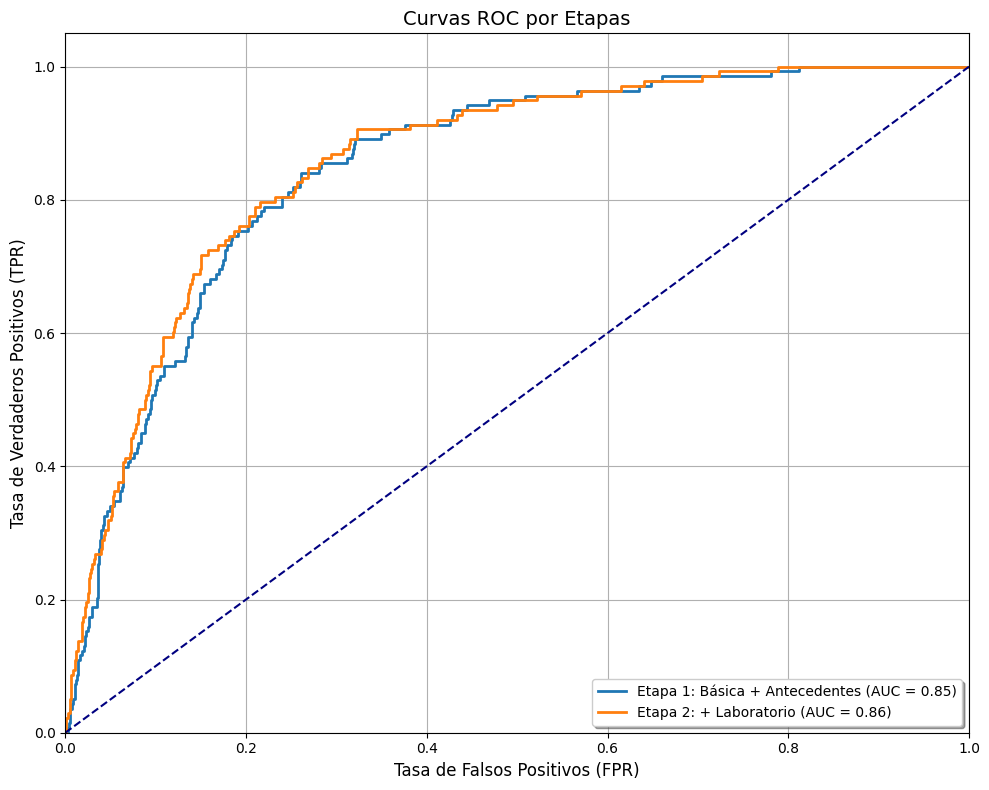

In [125]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Verificar longitudes de listas
print(f"Longitud de etapas: {len(etapas)}")
print(f"Longitud de modelos entrenados: {len(modelos_cat_staged)}")

# Inicializar la gráfica
plt.figure(figsize=(10, 8))

# Graficar la curva ROC solo si hay modelos y etapas coincidentes
if len(etapas) == len(modelos_cat_staged):
    for i in range(len(etapas)):
        # Seleccionar las probabilidades de la etapa actual (test set)
        # Asegurarse de usar las columnas correctas para el X_test de cada etapa
        X_test_etapa = X_test[etapas[i]].apply(pd.to_numeric, errors='coerce').fillna(0)
        prob_test = modelos_cat_staged[i].predict_proba(X_test_etapa)[:, 1]  # Probabilidad de la clase positiva

        # Calcular la Curva ROC
        fpr, tpr, thresholds = roc_curve(y_test, prob_test)
        roc_auc = auc(fpr, tpr)  # AUC (Área bajo la curva)

        # Graficar la Curva ROC para la etapa actual
        plt.plot(fpr, tpr, lw=2, label=f'{nombres_etapas[i]} (AUC = {roc_auc:.2f})')

    # Graficar configuración
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Línea diagonal (sin discriminación)
    plt.xlim([0.0, 1.0])  # Eje X
    plt.ylim([0.0, 1.05])  # Eje Y
    plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
    plt.title('Curvas ROC por Etapas', fontsize=14)
    plt.legend(loc='lower right', frameon=True, shadow=True)
    plt.grid(True)

    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

else:
    print("Error: La longitud de las etapas y los modelos entrenados no coincide.")



Info for Etapa 1: Básica + Antecedentes training data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   4454 non-null   float64
 1   genero                                 4454 non-null   int64  
 2   fumo_100_cigarrillos                   4454 non-null   int64  
 3   consumo_alcohol_ultimo_año_1.0         4454 non-null   float64
 4   actividad_deportiva_moderada_x_semana  4454 non-null   float64
 5   anhedonia_1.0                          4454 non-null   float64
 6   anhedonia_2.0                          4454 non-null   float64
 7   anhedonia_9.0                          4454 non-null   float64
 8   anhedonia_3.0                          4454 non-null   float64
 9   consumo_alcohol_ultimo_año_2.0         4454 non-null   float64
 10  consumo_alcohol_

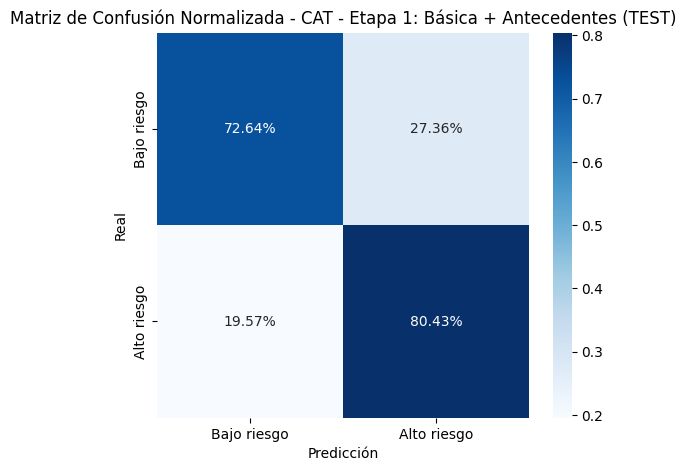


Info for Etapa 2: + Laboratorio training data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   4454 non-null   float64
 1   genero                                 4454 non-null   int64  
 2   fumo_100_cigarrillos                   4454 non-null   int64  
 3   consumo_alcohol_ultimo_año_1.0         4454 non-null   float64
 4   actividad_deportiva_moderada_x_semana  4454 non-null   float64
 5   anhedonia_1.0                          4454 non-null   float64
 6   anhedonia_2.0                          4454 non-null   float64
 7   anhedonia_9.0                          4454 non-null   float64
 8   anhedonia_3.0                          4454 non-null   float64
 9   consumo_alcohol_ultimo_año_2.0         4454 non-null   float64
 10  consumo_alcohol_ultimo_a

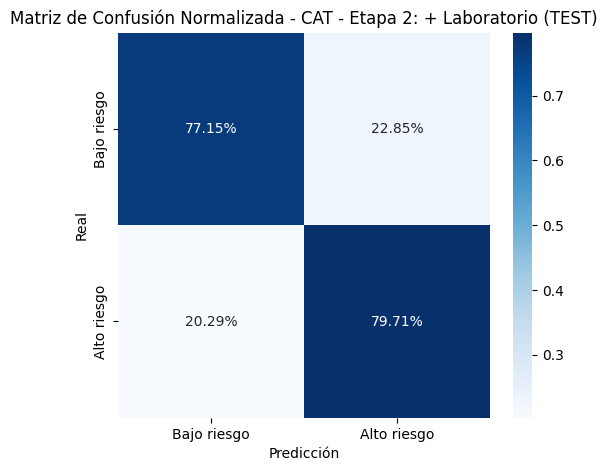


 RESUMEN FINAL POR ETAPAS (CATBOOST):
                            Etapa  auc_test  recall_test  precision_test
0  Etapa 1: Básica + Antecedentes  0.842310     0.804348        0.293651
1          Etapa 2: + Laboratorio  0.848413     0.797101        0.330330


,Etapa,auc_train,recall_train,precision_train,f1_train,auc_test,recall_test,precision_test,f1_test,auc_gap,recall_gap
0,Etapa 1: Básica + Antecedentes,0.944672,0.971067,0.356337,0.521359,0.842310,0.804348,0.293651,0.430233,0.102362,0.166719
1,Etapa 2: + Laboratorio,0.966009,0.981917,0.404620,0.573087,0.848413,0.797101,0.330330,0.467091,0.117597,0.184815


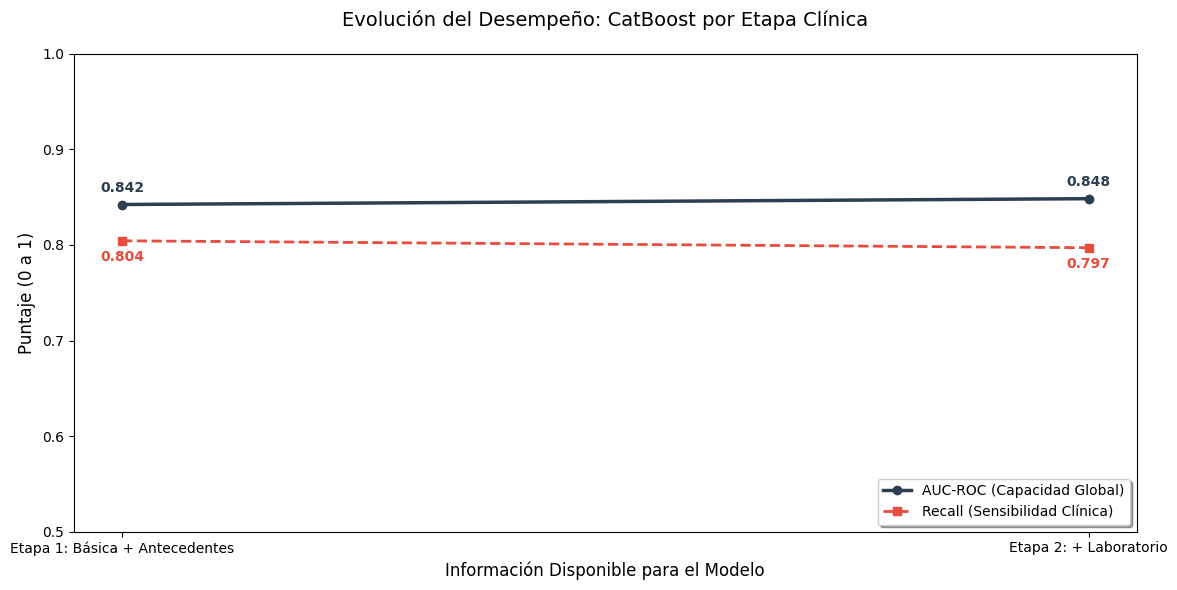

In [126]:
from catboost import CatBoostClassifier
import pandas as pd
import matplotlib.pyplot as plt
import joblib # Import joblib here

# --- Inicializar listas para resultados y modelos ---
# The 'results' list already exists globally, but we'll re-initialize our
# temporary lists for this specific task's CatBoost models.
resultados_etapas_cat = []
modelos_cat_staged = []

# --- Loop por etapas para entrenar CatBoost ---
for i in range(len(etapas)):
    # Seleccionar features de la etapa actual
    X_train_etapa_cat = X_train[etapas[i]].apply(pd.to_numeric, errors='coerce').fillna(0)
    X_test_etapa_cat  = X_test[etapas[i]].apply(pd.to_numeric, errors='coerce').fillna(0)

    print(f"\nInfo for {nombres_etapas[i]} training data:")
    X_train_etapa_cat.info()

    # Configurar modelo CatBoost
    modelo_etapa_cat = CatBoostClassifier(
      iterations=500,
      depth=4,
      learning_rate=0.05,
      min_data_in_leaf=10,
      l2_leaf_reg=5,
      subsample=0.8,
      colsample_bylevel=0.8,
      scale_pos_weight=(sum(y_train==0)/sum(y_train==1)),
      cat_features=[],
      verbose=0, # Set verbose to 0 to reduce output during training
      random_state=42
    )

    # Entrenar modelo
    modelo_etapa_cat.fit(X_train_etapa_cat, y_train)

    # Guardar modelo entrenado
    modelos_cat_staged.append(modelo_etapa_cat)

    # Guardar el modelo en un archivo .joblib
    filename = f'/content/drive/My Drive/NHANES/modelo_catboost_etapa{i+1}.joblib'
    joblib.dump(modelo_etapa_cat, filename)
    print(f"Modelo guardado como: {filename}")

    # Evaluar overfitting
    print(f"\n❕ EVALUANDO CON CATBOOST: {nombres_etapas[i]}")
    metricas_cat_etapa = evaluar_overfitting(
        modelo_etapa_cat,
        X_train_etapa_cat, y_train,
        X_test_etapa_cat, y_test,
        threshold=0.4,
        nombre=f"CAT - {nombres_etapas[i]}"
    )

    # Guardar métricas
    resultados_etapas_cat.append({"Etapa": nombres_etapas[i], **metricas_cat_etapa})

# --- DataFrame resumen ---
df_etapas_cat = pd.DataFrame(resultados_etapas_cat)

# --- Agregar resultados a la lista global 'results' ---
for cat_metrics_dict in resultados_etapas_cat:
    cat_metrics_for_global_results = cat_metrics_dict.copy()
    cat_metrics_for_global_results['Modelo'] = f"CatBoost - {cat_metrics_for_global_results['Etapa']}"
    del cat_metrics_for_global_results['Etapa']
    results.append(cat_metrics_for_global_results)

print("\n RESUMEN FINAL POR ETAPAS (CATBOOST):")
print(df_etapas_cat[['Etapa', 'auc_test', 'recall_test', 'precision_test']])
display(df_etapas_cat)

# --- Gráfica de evolución ---
plt.figure(figsize=(12, 6))

plt.plot(df_etapas_cat['Etapa'], df_etapas_cat['auc_test'],
         marker='o', linestyle='-', color='#2c3e50', linewidth=2.5, label='AUC-ROC (Capacidad Global)')

plt.plot(df_etapas_cat['Etapa'], df_etapas_cat['recall_test'],
         marker='s', linestyle='--', color='#e74c3c', linewidth=2, label='Recall (Sensibilidad Clínica)')

plt.title('Evolución del Desempeño: CatBoost por Etapa Clínica', fontsize=14, pad=20)
plt.ylabel('Puntaje (0 a 1)', fontsize=12)
plt.xlabel('Información Disponible para el Modelo', fontsize=12)
plt.ylim(0.5, 1.0)
plt.legend(loc='lower right', frameon=True, shadow=True)

# Anotar los puntos con sus valores
for x_val, auc_val, recall_val in zip(df_etapas_cat['Etapa'], df_etapas_cat['auc_test'], df_etapas_cat['recall_test']):
    plt.text(x_val, auc_val + 0.01, f'{auc_val:.3f}', ha='center', va='bottom', fontweight='bold', color='#2c3e50')
    plt.text(x_val, recall_val - 0.01, f'{recall_val:.3f}', ha='center', va='top', fontweight='bold', color='#e74c3c')

plt.tight_layout()
plt.show()

In [127]:
import joblib
import pandas as pd
import numpy as np

# Cargar los modelos entrenados
model_etapa1 = joblib.load('/content/drive/My Drive/NHANES/modelo_catboost_etapa1.joblib')
model_etapa2 = joblib.load('/content/drive/My Drive/NHANES/modelo_catboost_etapa2.joblib')

print("Modelos CatBoost de Etapa 1 y Etapa 2 cargados exitosamente.")


Modelos CatBoost de Etapa 1 y Etapa 2 cargados exitosamente.


Modelo guardado como: /content/drive/My Drive/NHANES/modelo_catboost_undersampling_etapa1.joblib

❕ EVALUANDO CON CATBOOST (Undersampling): Etapa 1: Básica + Antecedentes

===== Undersampling - Etapa 1: Básica + Antecedentes ====
---- TRAIN ----
AUC: 1.0000
Recall: 1.0000
Precision: 1.0000
F1: 1.0000

---- TEST ----
AUC: 0.8239
Recall: 0.7971
Precision: 0.2657
F1: 0.3986

---- GAP (Train-Test) ----
AUC gap: 0.1761
Recall gap: 0.2029


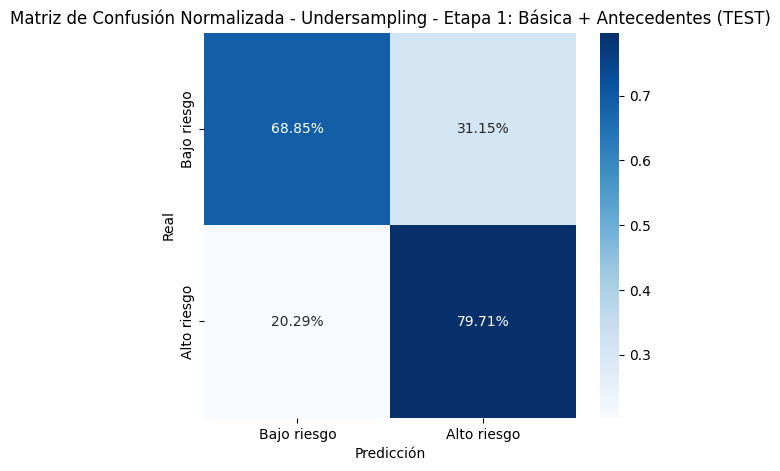

Modelo guardado como: /content/drive/My Drive/NHANES/modelo_catboost_undersampling_etapa2.joblib

❕ EVALUANDO CON CATBOOST (Undersampling): Etapa 2: + Laboratorio

===== Undersampling - Etapa 2: + Laboratorio ====
---- TRAIN ----
AUC: 1.0000
Recall: 1.0000
Precision: 1.0000
F1: 1.0000

---- TEST ----
AUC: 0.8354
Recall: 0.8406
Precision: 0.2816
F1: 0.4218

---- GAP (Train-Test) ----
AUC gap: 0.1646
Recall gap: 0.1594


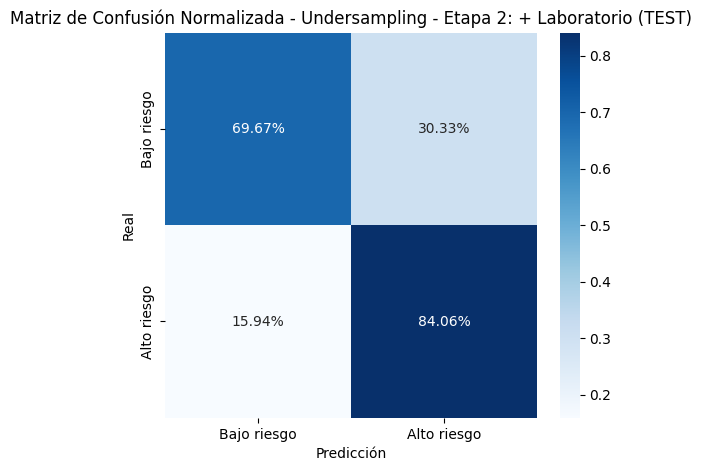


 RESUMEN FINAL POR ETAPAS (Undersampling):
                            Etapa  auc_test  recall_test  precision_test
0  Etapa 1: Básica + Antecedentes  0.823934     0.797101        0.265700
1          Etapa 2: + Laboratorio  0.835442     0.840580        0.281553


,Etapa,auc_train,recall_train,precision_train,f1_train,auc_test,recall_test,precision_test,f1_test,auc_gap,recall_gap
0,Etapa 1: Básica + Antecedentes,1.0,1.0,1.0,1.0,0.823934,0.797101,0.265700,0.398551,0.176066,0.202899
1,Etapa 2: + Laboratorio,1.0,1.0,1.0,1.0,0.835442,0.840580,0.281553,0.421818,0.164558,0.159420


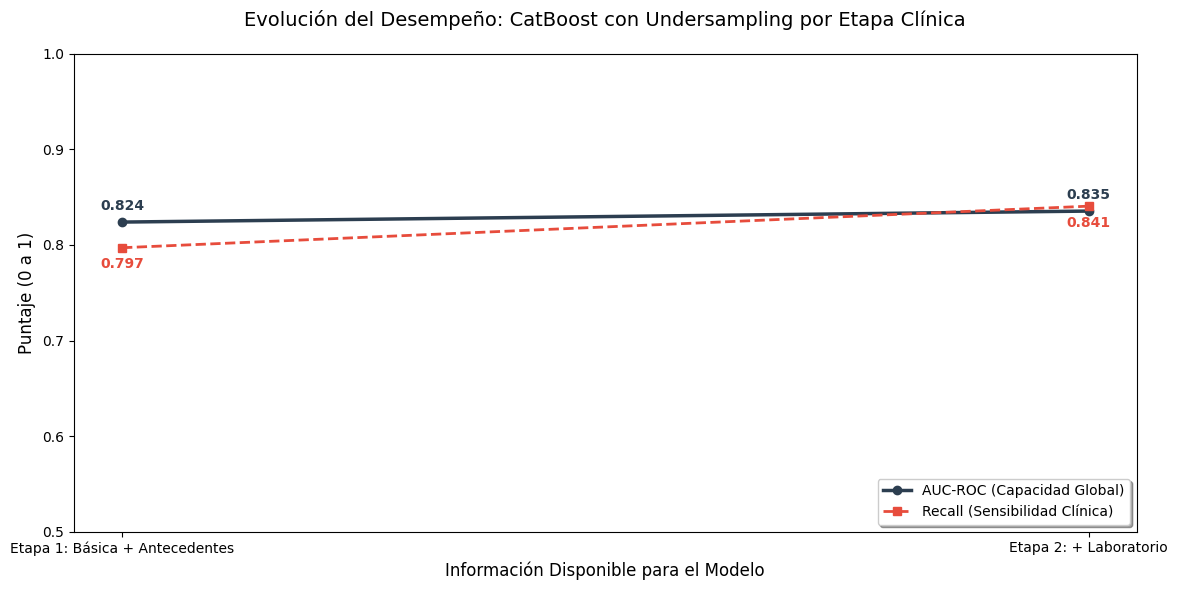

In [128]:
from imblearn.under_sampling import RandomUnderSampler
import joblib

# --- Inicializar listas para resultados y modelos ---
resultados_etapas_under = []
modelos_under_staged = []

# --- Loop por etapas para entrenar CatBoost con Undersampling ---
for i in range(len(etapas)):
    # Seleccionar features de la etapa actual
    X_train_etapa_under = X_train[etapas[i]].apply(pd.to_numeric, errors='coerce').fillna(0)
    X_test_etapa_under  = X_test[etapas[i]].apply(pd.to_numeric, errors='coerce').fillna(0)

    # Balanceo con Undersampling (solo en entrenamiento)
    undersampler = RandomUnderSampler(sampling_strategy=1.0, random_state=42)  # Reducir clase mayoritaria
    X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_etapa_under, y_train)

    # Configurar modelo CatBoost
    modelo_etapa_under = CatBoostClassifier(
        iterations=1000,
        depth=8,
        learning_rate=0.03,
        min_data_in_leaf=4,
        l2_leaf_reg=5,
        subsample=0.8,
        colsample_bylevel=0.8,
        cat_features=[],
        verbose=0,
        random_state=42
    )

    # Entrenar modelo con Undersampling
    modelo_etapa_under.fit(X_train_resampled, y_train_resampled)

    # Guardar modelo entrenado
    modelos_under_staged.append(modelo_etapa_under)

    # Guardar el modelo en un archivo .joblib
    filename = f'/content/drive/My Drive/NHANES/modelo_catboost_undersampling_etapa{i+1}.joblib'
    joblib.dump(modelo_etapa_under, filename)
    print(f"Modelo guardado como: {filename}")

    # Evaluar overfitting
    print(f"\n❕ EVALUANDO CON CATBOOST (Undersampling): {nombres_etapas[i]}")
    metricas_under_etapa = evaluar_overfitting(
        modelo_etapa_under,
        X_train_resampled, y_train_resampled,
        X_test_etapa_under, y_test,
        threshold=0.4,
        nombre=f"Undersampling - {nombres_etapas[i]}"
    )

    # Guardar métricas
    resultados_etapas_under.append({"Etapa": nombres_etapas[i], **metricas_under_etapa})

# --- DataFrame resumen ---
df_etapas_under = pd.DataFrame(resultados_etapas_under)

# --- Agregar resultados a la lista global 'results' ---
for under_metrics_dict in resultados_etapas_under:
    under_metrics_for_global_results = under_metrics_dict.copy()
    under_metrics_for_global_results['Modelo'] = f"CatBoost (Undersampling) - {under_metrics_for_global_results['Etapa']}"
    del under_metrics_for_global_results['Etapa']
    results.append(under_metrics_for_global_results)

print("\n RESUMEN FINAL POR ETAPAS (Undersampling):")
print(df_etapas_under[['Etapa', 'auc_test', 'recall_test', 'precision_test']])
display(df_etapas_under)

# --- Gráfica de evolución ---
plt.figure(figsize=(12, 6))

plt.plot(df_etapas_under['Etapa'], df_etapas_under['auc_test'],
         marker='o', linestyle='-', color='#2c3e50', linewidth=2.5, label='AUC-ROC (Capacidad Global)')

plt.plot(df_etapas_under['Etapa'], df_etapas_under['recall_test'],
         marker='s', linestyle='--', color='#e74c3c', linewidth=2, label='Recall (Sensibilidad Clínica)')

plt.title('Evolución del Desempeño: CatBoost con Undersampling por Etapa Clínica', fontsize=14, pad=20)
plt.ylabel('Puntaje (0 a 1)', fontsize=12)
plt.xlabel('Información Disponible para el Modelo', fontsize=12)
plt.ylim(0.5, 1.0)
plt.legend(loc='lower right', frameon=True, shadow=True)

# Anotar los puntos con sus valores
for x_val, auc_val, recall_val in zip(df_etapas_under['Etapa'], df_etapas_under['auc_test'], df_etapas_under['recall_test']):
    plt.text(x_val, auc_val + 0.01, f'{auc_val:.3f}', ha='center', va='bottom', fontweight='bold', color='#2c3e50')
    plt.text(x_val, recall_val - 0.01, f'{recall_val:.3f}', ha='center', va='top', fontweight='bold', color='#e74c3c')

plt.tight_layout()
plt.show()


Info for Etapa 1: Básica + Antecedentes training data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   4454 non-null   float64
 1   genero                                 4454 non-null   int64  
 2   fumo_100_cigarrillos                   4454 non-null   int64  
 3   consumo_alcohol_ultimo_año_1.0         4454 non-null   float64
 4   actividad_deportiva_moderada_x_semana  4454 non-null   float64
 5   anhedonia_1.0                          4454 non-null   float64
 6   anhedonia_2.0                          4454 non-null   float64
 7   anhedonia_9.0                          4454 non-null   float64
 8   anhedonia_3.0                          4454 non-null   float64
 9   consumo_alcohol_ultimo_año_2.0         4454 non-null   float64
 10  consumo_alcohol_

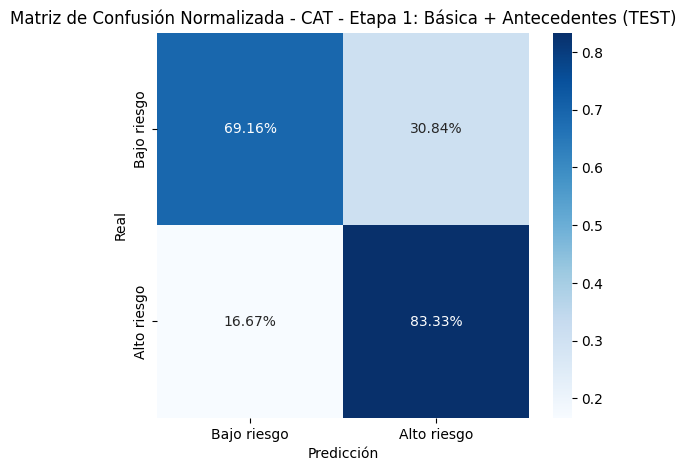


Info for Etapa 2: + Laboratorio training data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   4454 non-null   float64
 1   genero                                 4454 non-null   int64  
 2   fumo_100_cigarrillos                   4454 non-null   int64  
 3   consumo_alcohol_ultimo_año_1.0         4454 non-null   float64
 4   actividad_deportiva_moderada_x_semana  4454 non-null   float64
 5   anhedonia_1.0                          4454 non-null   float64
 6   anhedonia_2.0                          4454 non-null   float64
 7   anhedonia_9.0                          4454 non-null   float64
 8   anhedonia_3.0                          4454 non-null   float64
 9   consumo_alcohol_ultimo_año_2.0         4454 non-null   float64
 10  consumo_alcohol_ultimo_a

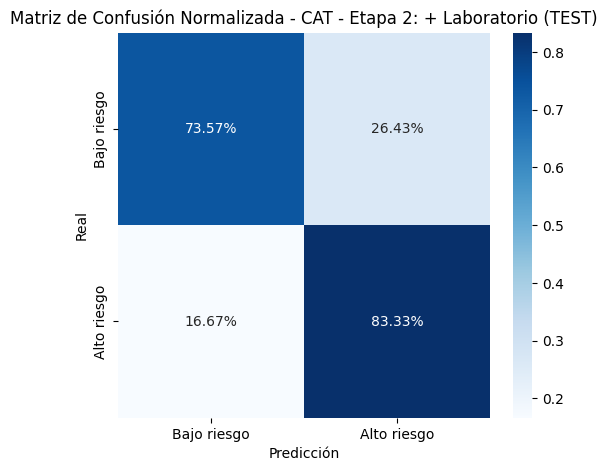


 RESUMEN FINAL POR ETAPAS (CATBOOST):
                            Etapa  auc_test  recall_test  precision_test
0  Etapa 1: Básica + Antecedentes  0.842310     0.833333        0.276442
1          Etapa 2: + Laboratorio  0.848413     0.833333        0.308311


,Etapa,auc_train,recall_train,precision_train,f1_train,auc_test,recall_test,precision_test,f1_test,auc_gap,recall_gap
0,Etapa 1: Básica + Antecedentes,0.944672,0.983725,0.325164,0.488769,0.842310,0.833333,0.276442,0.415162,0.102362,0.150392
1,Etapa 2: + Laboratorio,0.966009,0.989150,0.366131,0.534441,0.848413,0.833333,0.308311,0.450098,0.117597,0.155817


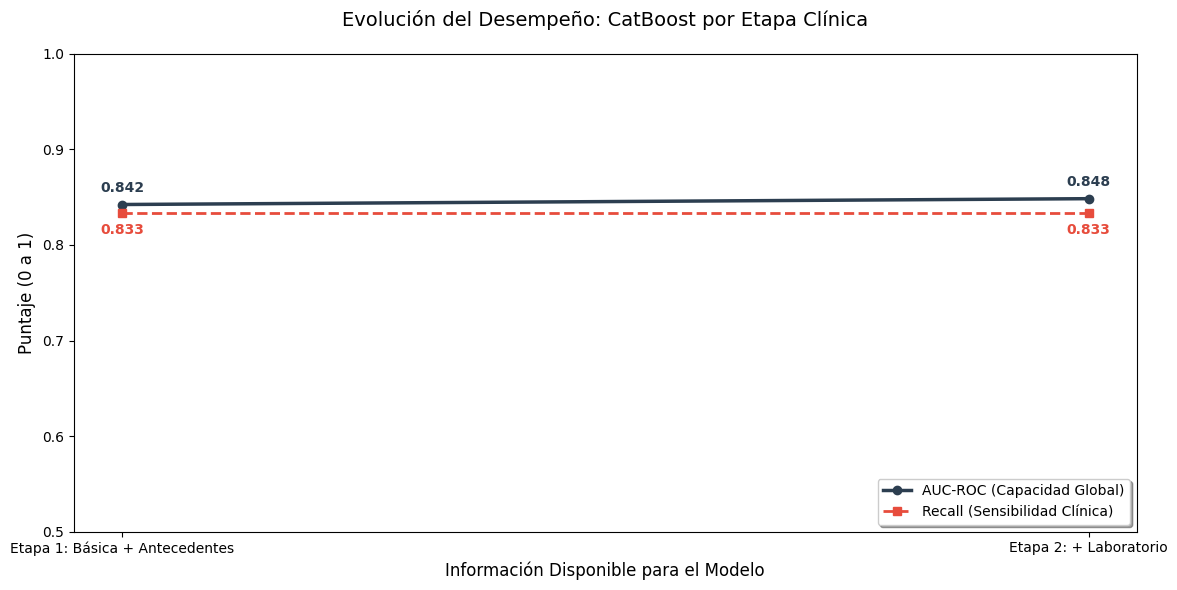

In [129]:
from catboost import CatBoostClassifier
import pandas as pd
import matplotlib.pyplot as plt
import joblib # Import joblib here

# --- Inicializar listas para resultados y modelos ---
# The 'results' list already exists globally, but we'll re-initialize our
# temporary lists for this specific task's CatBoost models.
resultados_etapas_cat = []
modelos_cat_staged = []

# --- Loop por etapas para entrenar CatBoost ---
for i in range(len(etapas)):
    # Seleccionar features de la etapa actual
    X_train_etapa_cat = X_train[etapas[i]].apply(pd.to_numeric, errors='coerce').fillna(0)
    X_test_etapa_cat  = X_test[etapas[i]].apply(pd.to_numeric, errors='coerce').fillna(0)

    print(f"\nInfo for {nombres_etapas[i]} training data:")
    X_train_etapa_cat.info()

    # Configurar modelo CatBoost
    modelo_etapa_cat = CatBoostClassifier(
      iterations=500,
      depth=4,
      learning_rate=0.05,
      min_data_in_leaf=10,
      l2_leaf_reg=5,
      subsample=0.8,
      colsample_bylevel=0.8,
      auto_class_weights='Balanced',
      cat_features=[],
      verbose=0,
      random_state=42
    )

    # Entrenar modelo
    modelo_etapa_cat.fit(X_train_etapa_cat, y_train)

    # Guardar modelo entrenado
    modelos_cat_staged.append(modelo_etapa_cat)

    # Guardar el modelo en un archivo .joblib
    filename = f'modelo_catboost_etapa{i+1}.joblib'
    joblib.dump(modelo_etapa_cat, filename)
    print(f"Modelo guardado como: {filename}")

    # Evaluar overfitting
    print(f"\n❕ EVALUANDO CON CATBOOST: {nombres_etapas[i]}")
    metricas_cat_etapa = evaluar_overfitting(
        modelo_etapa_cat,
        X_train_etapa_cat, y_train,
        X_test_etapa_cat, y_test,
        threshold=0.35,
        nombre=f"CAT - {nombres_etapas[i]}"
    )

    # Guardar métricas
    resultados_etapas_cat.append({"Etapa": nombres_etapas[i], **metricas_cat_etapa})

# --- DataFrame resumen ---
df_etapas_cat = pd.DataFrame(resultados_etapas_cat)

# --- Agregar resultados a la lista global 'results' ---
for cat_metrics_dict in resultados_etapas_cat:
    cat_metrics_for_global_results = cat_metrics_dict.copy()
    cat_metrics_for_global_results['Modelo'] = f"CatBoost - {cat_metrics_for_global_results['Etapa']}"
    del cat_metrics_for_global_results['Etapa']
    results.append(cat_metrics_for_global_results)

print("\n RESUMEN FINAL POR ETAPAS (CATBOOST):")
print(df_etapas_cat[['Etapa', 'auc_test', 'recall_test', 'precision_test']])
display(df_etapas_cat)

# --- Gráfica de evolución ---
plt.figure(figsize=(12, 6))

plt.plot(df_etapas_cat['Etapa'], df_etapas_cat['auc_test'],
         marker='o', linestyle='-', color='#2c3e50', linewidth=2.5, label='AUC-ROC (Capacidad Global)')

plt.plot(df_etapas_cat['Etapa'], df_etapas_cat['recall_test'],
         marker='s', linestyle='--', color='#e74c3c', linewidth=2, label='Recall (Sensibilidad Clínica)')

plt.title('Evolución del Desempeño: CatBoost por Etapa Clínica', fontsize=14, pad=20)
plt.ylabel('Puntaje (0 a 1)', fontsize=12)
plt.xlabel('Información Disponible para el Modelo', fontsize=12)
plt.ylim(0.5, 1.0)
plt.legend(loc='lower right', frameon=True, shadow=True)

# Anotar los puntos con sus valores
for x_val, auc_val, recall_val in zip(df_etapas_cat['Etapa'], df_etapas_cat['auc_test'], df_etapas_cat['recall_test']):
    plt.text(x_val, auc_val + 0.01, f'{auc_val:.3f}', ha='center', va='bottom', fontweight='bold', color='#2c3e50')
    plt.text(x_val, recall_val - 0.01, f'{recall_val:.3f}', ha='center', va='top', fontweight='bold', color='#e74c3c')

plt.tight_layout()
plt.show()